In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Daten einlesen & vorbereiten:

In [2]:
df = pd.read_csv('../daten/Emmental.csv', sep=';')

In [3]:
# Datetime-Spalten erstellen
df = df[['status', 'timestamps.effective_pickup', 'timestamps.effective_dropoff', 'pickup.station_chosen_confirmation_addr', 'dropoff.station_chosen_confirmation_addr']]
df['timestamps.effective_pickup'] = pd.to_datetime(df['timestamps.effective_pickup'])
df['timestamps.effective_dropoff'] = pd.to_datetime(df['timestamps.effective_dropoff'])

In [4]:
# Nur Fahrten übernehmen, die tatsächlich stattgefunden haben
df = df[df['timestamps.effective_dropoff'].notna() & df['timestamps.effective_pickup'].notna()]
df = df[df['status'] == 'FINISHED']
len(df)

14855

In [5]:
# Counts pro Tag hinzufügen & DF umformen
df = df[['timestamps.effective_pickup', 'status', 'pickup.station_chosen_confirmation_addr']]
df = df.groupby(pd.Grouper(key='timestamps.effective_pickup', freq='D')).count()
df.index.names = ['days']
df = pd.DataFrame({'Datum': df.index.get_level_values('days'), 'cnt': df.reset_index()['status']})

In [6]:
# Für jedes Datum 1 Eintrag erstellen (0-Werte ergänzen)
date_range = pd.DataFrame(pd.date_range(start=df.Datum.dt.date.min(), end=df.Datum.dt.date.max(), freq='d'), columns=['Datum'])
df = pd.merge(date_range, df, on=['Datum'], how='left')
df['cnt'] = df['cnt'].fillna(0)

In [7]:
# Neue Spalten für einzelne Teile von Datetime hinzufügen
df['year'] = df['Datum'].dt.year
df['month'] = df['Datum'].dt.month
df['day'] = df['Datum'].dt.day
df['weekday'] = df['Datum'].dt.weekday

In [8]:
# Für rt_processing vorbereiten
df = df.set_index('Datum')

In [9]:
df

,cnt,year,month,day,weekday
Datum,,,,,
2020-08-22,3,2020,8,22,5
2020-08-23,16,2020,8,23,6
2020-08-24,4,2020,8,24,0
2020-08-25,1,2020,8,25,1
2020-08-26,2,2020,8,26,2
...,...,...,...,...,...
2023-01-06,21,2023,1,6,4
2023-01-07,25,2023,1,7,5
2023-01-08,13,2023,1,8,6


### Modell:

In [10]:
df.corr()

,cnt,year,month,day,weekday
cnt,1.000000,0.582962,-0.039311,-0.047737,-0.114085
year,0.582962,1.000000,-0.329851,-0.056703,-0.000785
month,-0.039311,-0.329851,1.000000,0.037204,-0.003082
day,-0.047737,-0.056703,0.037204,1.000000,0.004140
weekday,-0.114085,-0.000785,-0.003082,0.004140,1.000000


Aufteilung Trainings-, Validierungs- & Testdaten:

In [11]:
%load_ext autoreload
%autoreload 2
import rt_processing

In [12]:
m01_train, m01_val, m01_test = rt_processing.train_val_test_auswahl(df, '2020-08-22', '2021-12-31', 0)
m02_train, m02_val, m02_test = rt_processing.train_val_test_auswahl(df, '2020-08-22', '2022-01-31', 0)
m03_train, m03_val, m03_test = rt_processing.train_val_test_auswahl(df, '2020-08-22', '2022-02-28', 0)
m04_train, m04_val, m04_test = rt_processing.train_val_test_auswahl(df, '2020-08-22', '2022-03-31', 0)
m05_train, m05_val, m05_test = rt_processing.train_val_test_auswahl(df, '2020-08-22', '2022-04-30', 0)
m06_train, m06_val, m06_test = rt_processing.train_val_test_auswahl(df, '2020-08-22', '2022-05-31', 0)
m07_train, m07_val, m07_test = rt_processing.train_val_test_auswahl(df, '2020-08-22', '2022-06-30', 0)
m08_train, m08_val, m08_test = rt_processing.train_val_test_auswahl(df, '2020-08-22', '2022-07-31', 0)
m09_train, m09_val, m09_test = rt_processing.train_val_test_auswahl(df, '2020-08-22', '2022-08-31', 0)
m10_train, m10_val, m10_test = rt_processing.train_val_test_auswahl(df, '2020-08-22', '2022-09-30', 0)
m11_train, m11_val, m11_test = rt_processing.train_val_test_auswahl(df, '2020-08-22', '2022-10-31', 0)

start_date_val:  2022-01-01 00:00:00 ⎮ end_date_val:  2022-01-31 00:00:00
start_date_test: 2022-02-01 00:00:00 ⎮ end_date_test: 2022-02-28 00:00:00 

start_date_val:  2022-02-01 00:00:00 ⎮ end_date_val:  2022-02-28 00:00:00
start_date_test: 2022-03-01 00:00:00 ⎮ end_date_test: 2022-03-31 00:00:00 

start_date_val:  2022-03-01 00:00:00 ⎮ end_date_val:  2022-03-31 00:00:00
start_date_test: 2022-04-01 00:00:00 ⎮ end_date_test: 2022-04-30 00:00:00 

start_date_val:  2022-04-01 00:00:00 ⎮ end_date_val:  2022-04-30 00:00:00
start_date_test: 2022-05-01 00:00:00 ⎮ end_date_test: 2022-05-31 00:00:00 

start_date_val:  2022-05-01 00:00:00 ⎮ end_date_val:  2022-05-31 00:00:00
start_date_test: 2022-06-01 00:00:00 ⎮ end_date_test: 2022-06-30 00:00:00 

start_date_val:  2022-06-01 00:00:00 ⎮ end_date_val:  2022-06-30 00:00:00
start_date_test: 2022-07-01 00:00:00 ⎮ end_date_test: 2022-07-31 00:00:00 

start_date_val:  2022-07-01 00:00:00 ⎮ end_date_val:  2022-07-31 00:00:00
start_date_test: 2022-08-0

In [13]:
# Anzahl Trainingsdaten pro Datensatz
print(len(m01_train),len(m02_train),len(m03_train),len(m04_train),len(m05_train),len(m06_train),len(m07_train),len(m08_train),len(m09_train),len(m10_train),len(m11_train))

497 528 556 587 617 648 678 709 740 770 801


--> sehr wenige Trainingsdaten!

In [14]:
# Erstellung der DataFrames, in welchen die Modell-Bezeichnung und die vier aufgeführten Qualitätsdaten abgespeichert werden:
qual_train = pd.DataFrame(columns=['Model', 'Dataset', 'R2', 'RMSE', 'MAE', 'MAPE'])
qual_val = pd.DataFrame(columns=['Model', 'Dataset', 'R2', 'RMSE', 'MAE', 'MAPE'])
qual_test = pd.DataFrame(columns=['Model', 'Dataset', 'R2', 'RMSE', 'MAE', 'MAPE'])

### Baseline:

In [15]:
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_baseline_performance(m01_train, m01_val, m01_test)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_baseline_performance(m02_train, m02_val, m02_test)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_baseline_performance(m03_train, m03_val, m03_test)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_baseline_performance(m04_train, m04_val, m04_test)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_baseline_performance(m05_train, m05_val, m05_test)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_baseline_performance(m06_train, m06_val, m06_test)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_baseline_performance(m07_train, m07_val, m07_test)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_baseline_performance(m08_train, m08_val, m08_test)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_baseline_performance(m09_train, m09_val, m09_test)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_baseline_performance(m10_train, m10_val, m10_test)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_baseline_performance(m11_train, m11_val, m11_test)

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Pr


 Baseline_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.0 
 RMSE:  7.031335601116926 
 MAE:  5.670700257885341 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  0.0 
 RMSE:  5.059274048930856 
 MAE:  4.197710718002081 
 MAPE:  25.355565246242218

 Baseline_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.0 
 RMSE:  7.0539047463493105 
 MAE:  5.691402662993572 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  0.0 
 RMSE:  6.836557643153699 
 MAE:  5.528061224489796 
 MAPE:  31.517023409121535

 Baseline_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.0 
 RMSE:  7.175337565481776 
 MAE:  5.75729775891517 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  0.0 
 RMSE:  4.904711150233176 
 MAE:  3.6295525494276797 
 MAPE:  20.253243538247755

 Baseline_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.0 
 RMSE:  7.27217433104941 
 MAE:  5.87446926450145 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  0.0 
 RMSE:  6.757711644237764 
 MAE: 

### Regression Tree:

None :


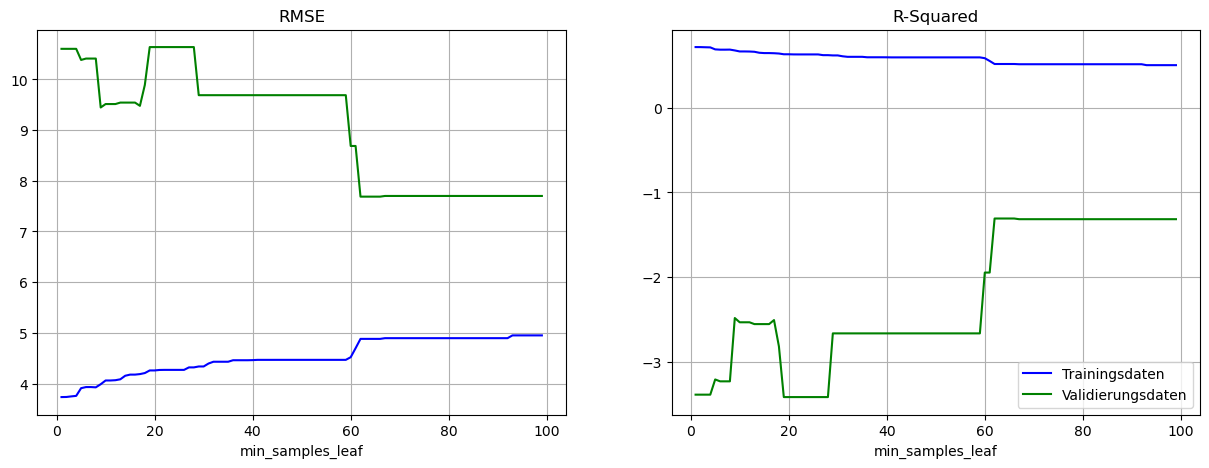

None :


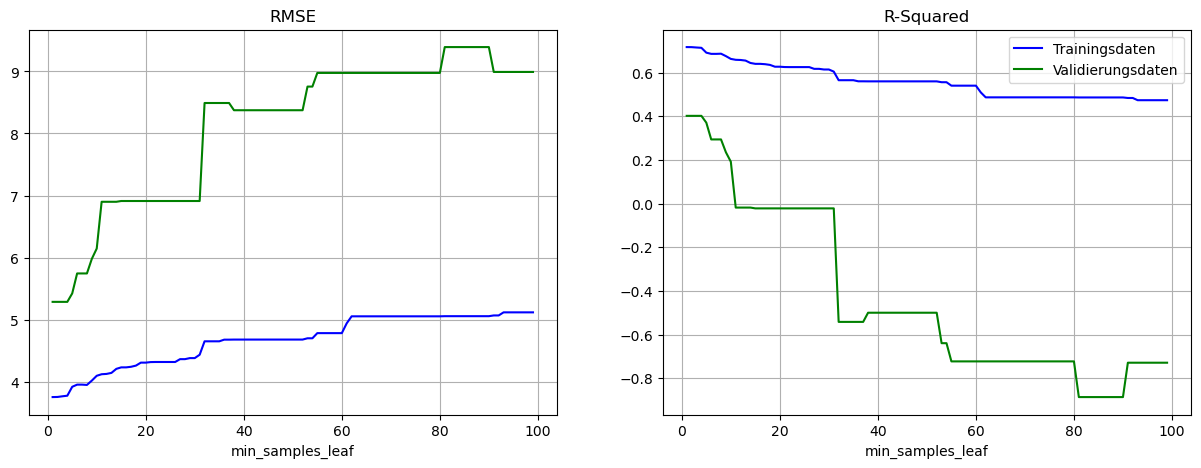

None :


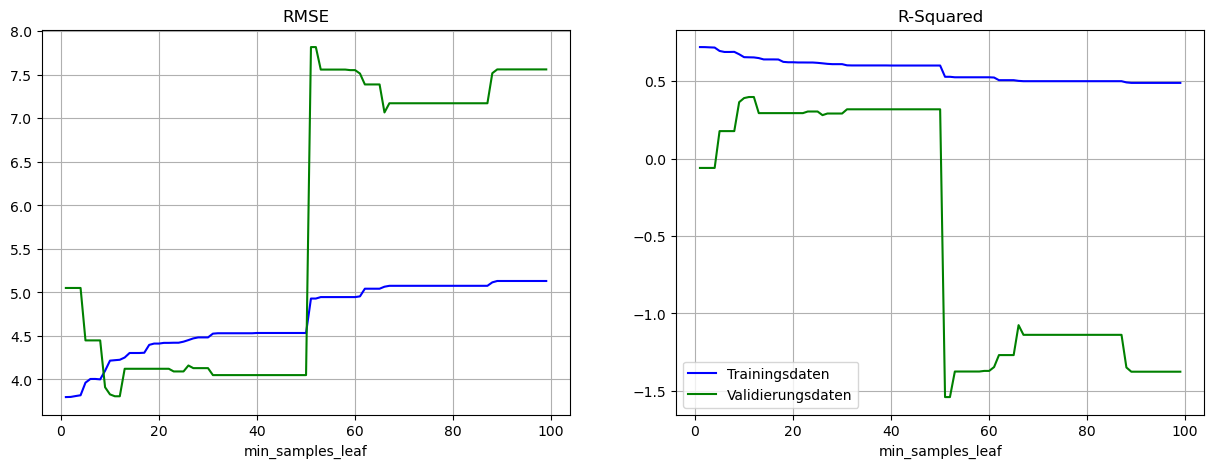

None :


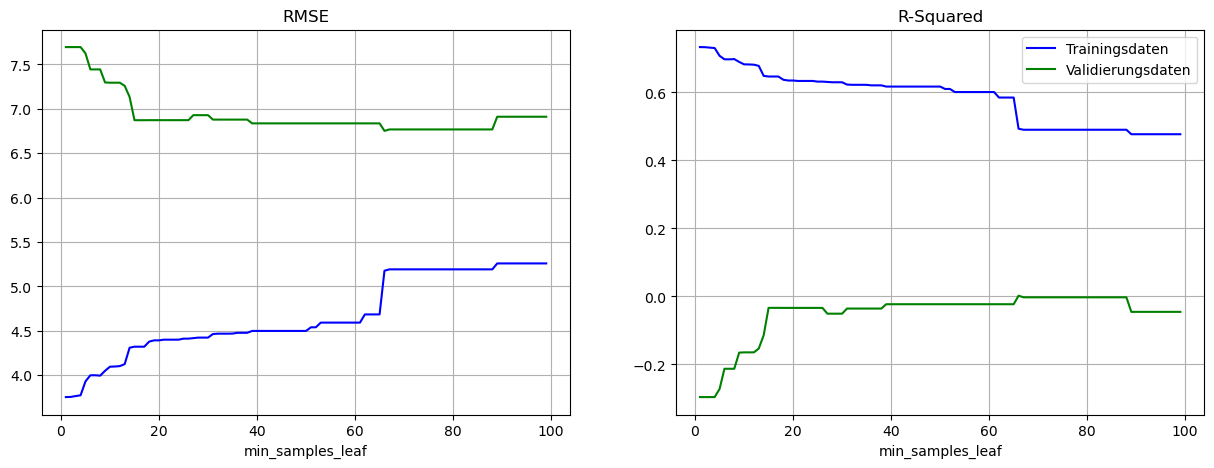

None :


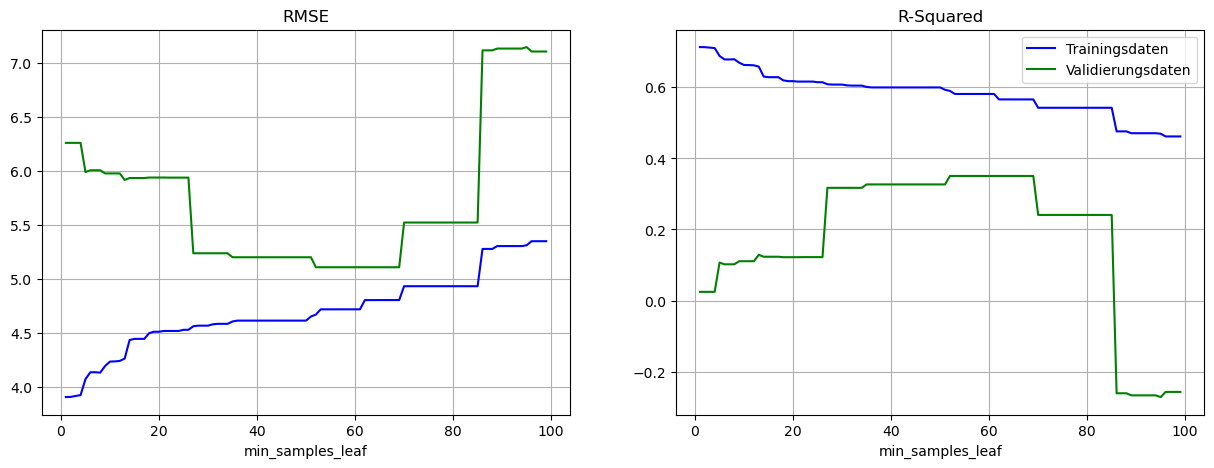

None :


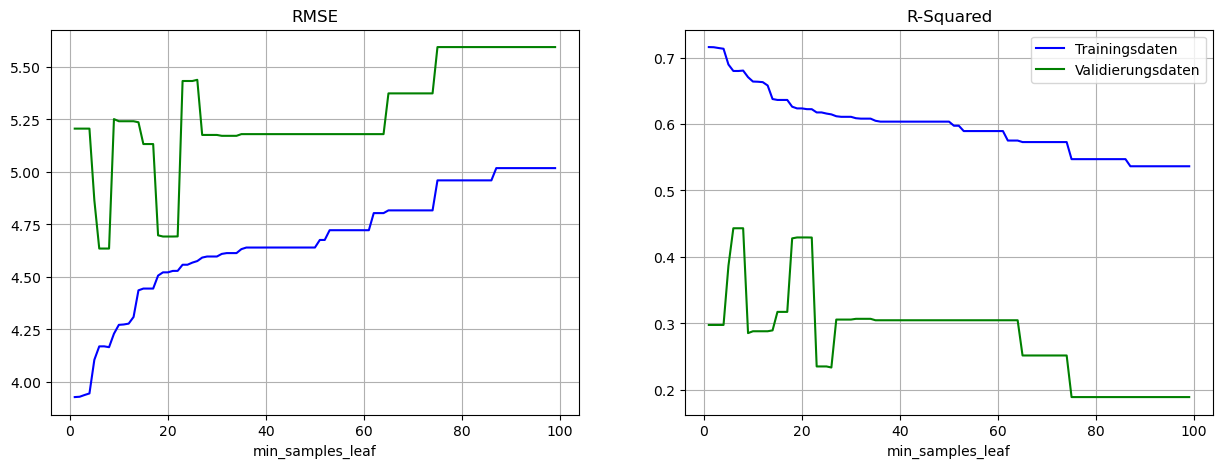

None :


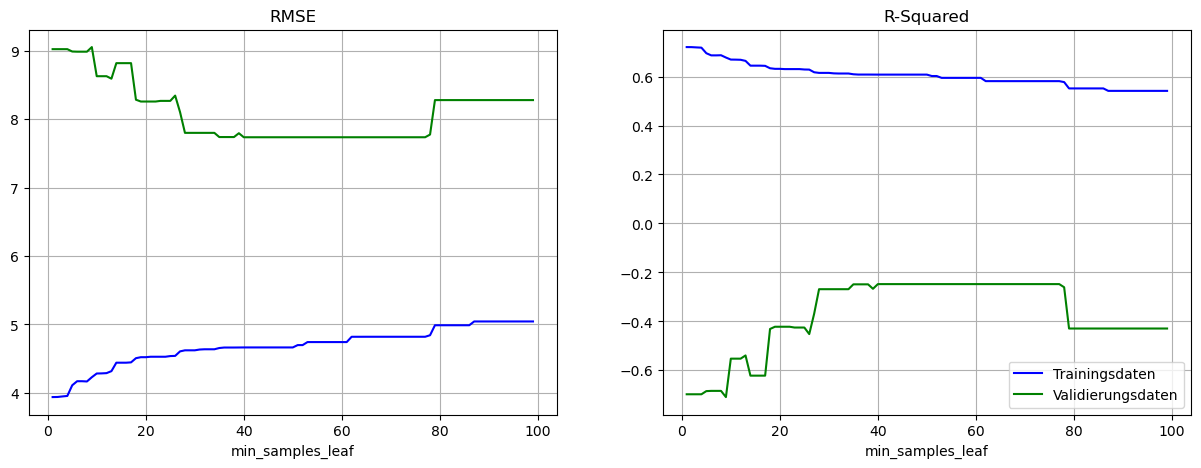

None :


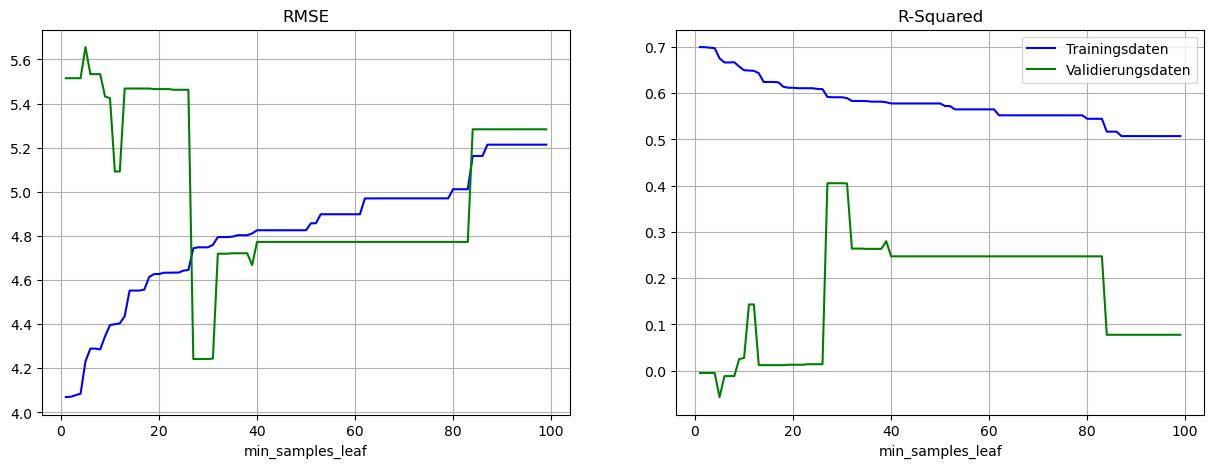

None :


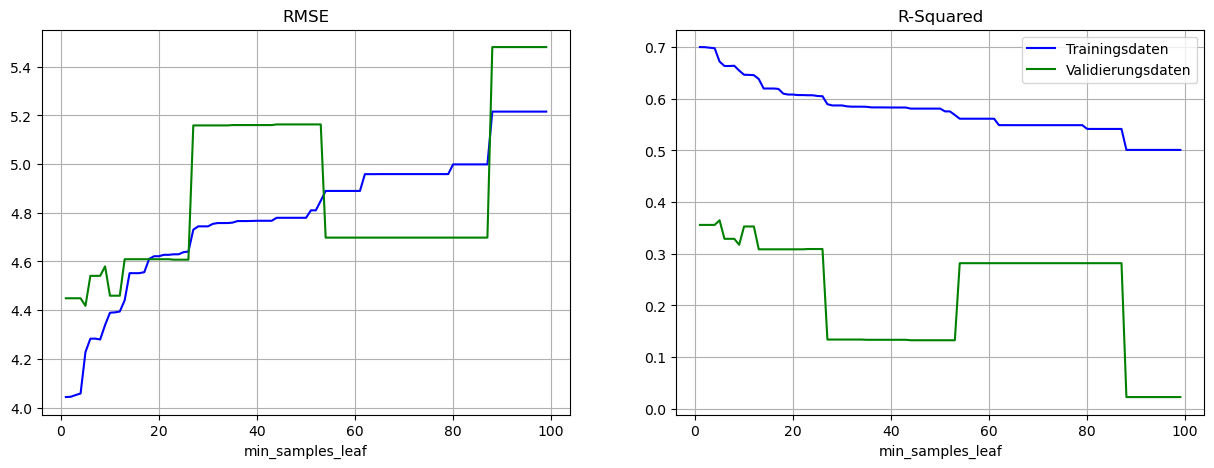

None :


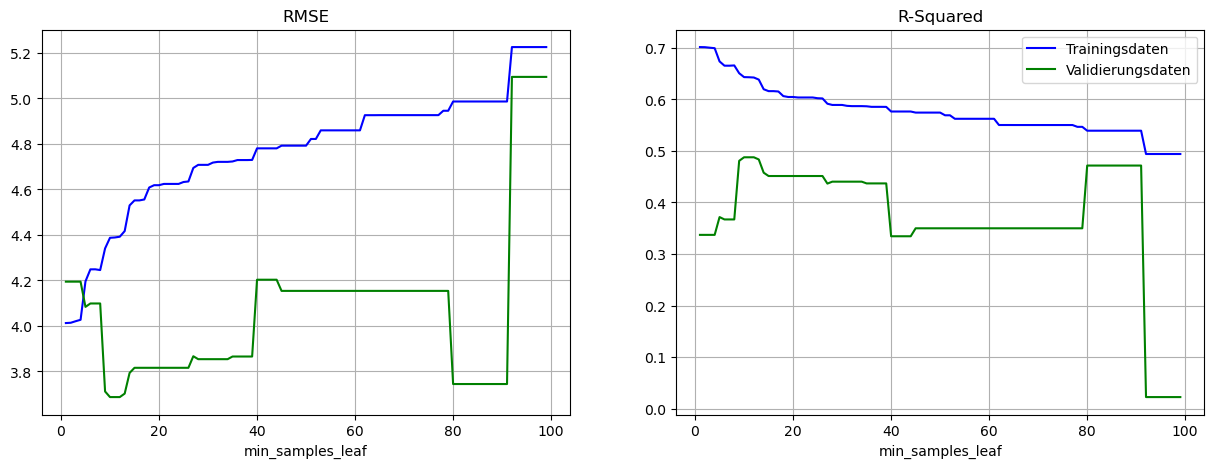

None :


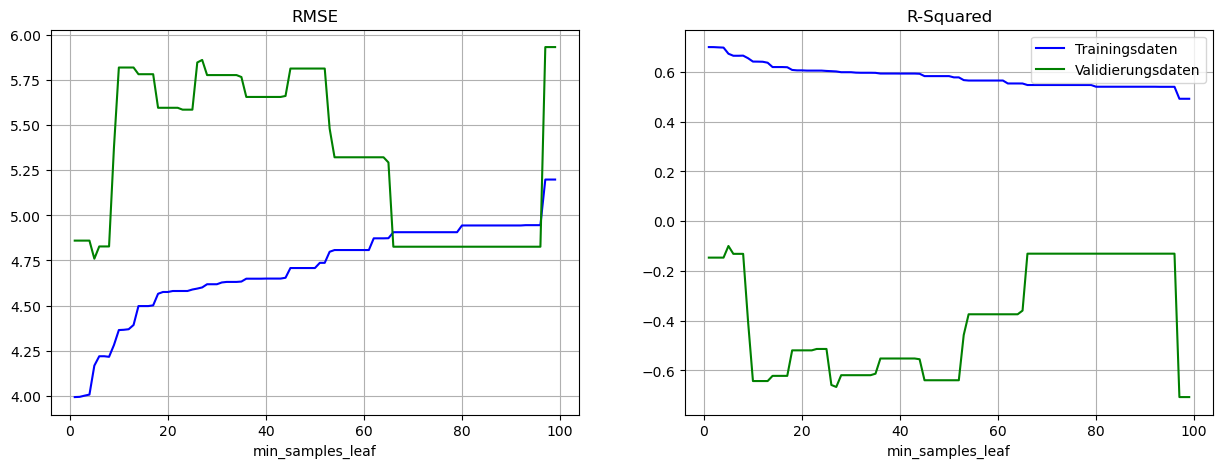

In [16]:
# Qualitätswerte für jedes Datenset mit min_samples_leaf=1-50 darstellen
rt_processing.get_rt_cv(m01_train, m01_val)
rt_processing.get_rt_cv(m02_train, m02_val)
rt_processing.get_rt_cv(m03_train, m03_val)
rt_processing.get_rt_cv(m04_train, m04_val)
rt_processing.get_rt_cv(m05_train, m05_val)
rt_processing.get_rt_cv(m06_train, m06_val)
rt_processing.get_rt_cv(m07_train, m07_val)
rt_processing.get_rt_cv(m08_train, m08_val)
rt_processing.get_rt_cv(m09_train, m09_val)
rt_processing.get_rt_cv(m10_train, m10_val)
rt_processing.get_rt_cv(m11_train, m11_val)

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100



 RT_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.5150968881791982 
 RMSE:  4.896269482179908 
 MAE:  3.891498450973387 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  -1.3164049906176243 
 RMSE:  7.700083783968696 
 MAE:  6.531510361033967 
 MAPE:  30.87991154054847

 RT_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.7145154331344981 
 RMSE:  3.7689546215620506 
 MAE:  2.952840909090909 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  0.40146494555576784 
 RMSE:  5.289106054631809 
 MAE:  4.242857142857143 
 MAPE:  22.0361993979043

 RT_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.6530679600335267 
 RMSE:  4.226341071277556 
 MAE:  3.3161253076840302 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  0.39741234355525457 
 RMSE:  3.807356568436843 
 MAE:  2.9819159335288368 
 MAPE:  13.311920563306407


/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100



 RT_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.490305784755548 
 RMSE:  5.191814101615231 
 MAE:  4.079181549629464 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  -0.0027176241754476305 
 RMSE:  6.7668878743490435 
 MAE:  5.389179396253864 
 MAPE:  36.87622242978221

 RT_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.5810837231135836 
 RMSE:  4.718806415506564 
 MAE:  3.6832844145853003 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  0.35045895532998195 
 RMSE:  5.108345445142637 
 MAE:  4.0874285688349055 
 MAPE:  19.15944741762087

 RT_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.6798916535828589 
 RMSE:  4.169832582793018 
 MAE:  3.2235829414070154 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  0.44309908643695495 
 RMSE:  4.635150317570017 
 MAE:  3.5112179487179485 
 MAPE:  18.86192864963855


/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100



 RT_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.5948574124656778 
 RMSE:  4.740753245901456 
 MAE:  3.686503403780001 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  -0.24817872324407242 
 RMSE:  7.736125454953318 
 MAE:  6.9784999946290265 
 MAPE:  53.15540642238313

 RT_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.5912705275587573 
 RMSE:  4.748201781779079 
 MAE:  3.717035292100302 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  0.4053073217602948 
 RMSE:  4.24181703655281 
 MAE:  3.436440799004304 
 MAPE:  21.32233774987031


/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100



 RT_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.6979517276130154 
 RMSE:  4.0575996828932235 
 MAE:  3.1695109395109395 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  0.3556755290287573 
 RMSE:  4.44876387325738 
 MAE:  3.316666666666666 
 MAPE:  19.490163000901326

 RT_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.6431199511015648 
 RMSE:  4.38884329251878 
 MAE:  3.410473573381369 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  0.48773565988764167 
 RMSE:  3.687428199986857 
 MAE:  3.1967387451258418 
 MAPE:  17.58087104005049


/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100



 RT_test :
Qualität auf Trainingsdaten: 
 R-squared:  0.6734129988268744 
 RMSE:  4.1684135943605 
 MAE:  3.2570254824936473 
 MAPE:  inf
Qualität auf Validierungsdaten: 
 R-squared:  -0.10002695391940564 
 RMSE:  4.759796869831281 
 MAE:  3.9217877492877493 
 MAPE:  16.812903747176883


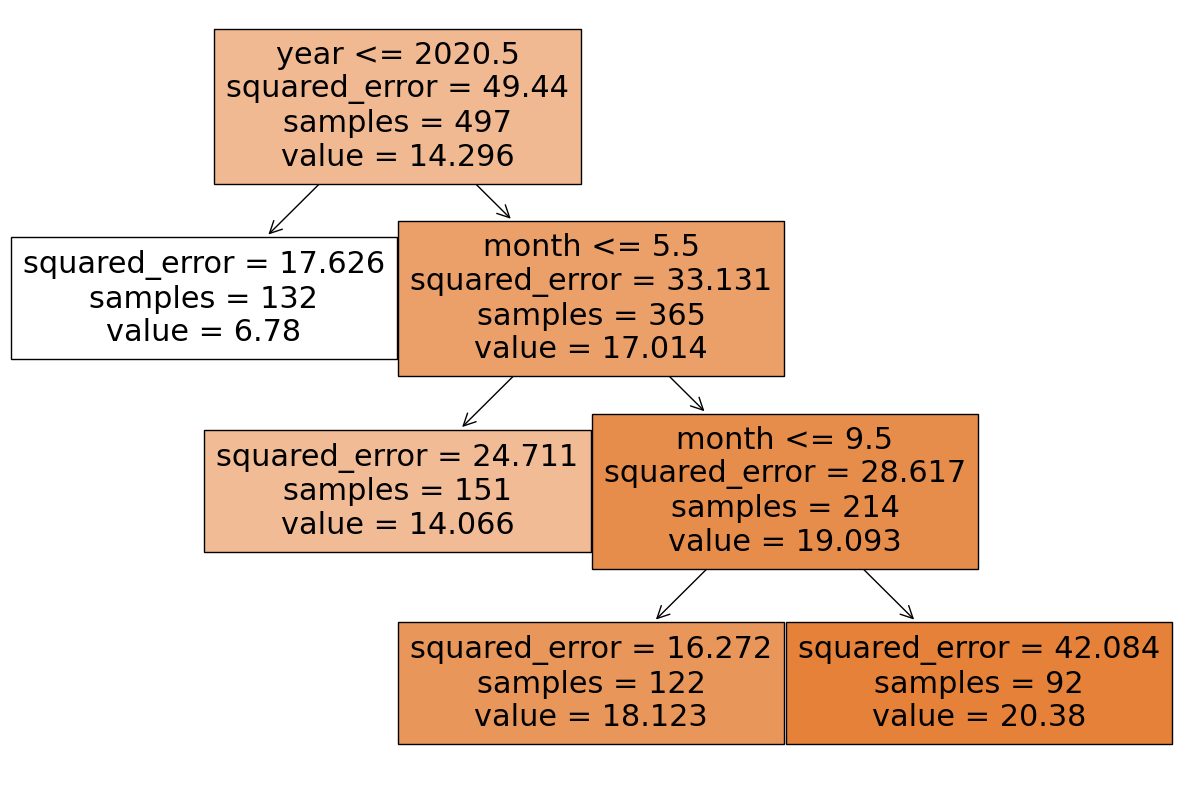

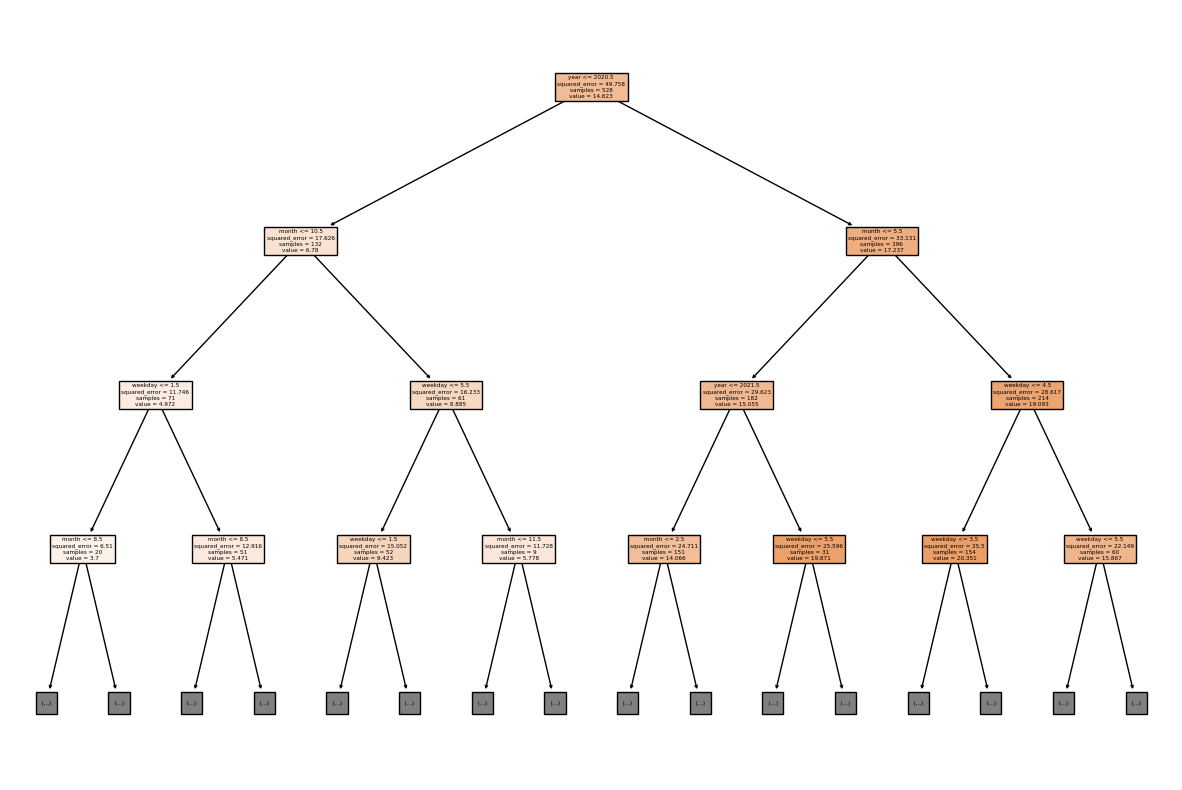

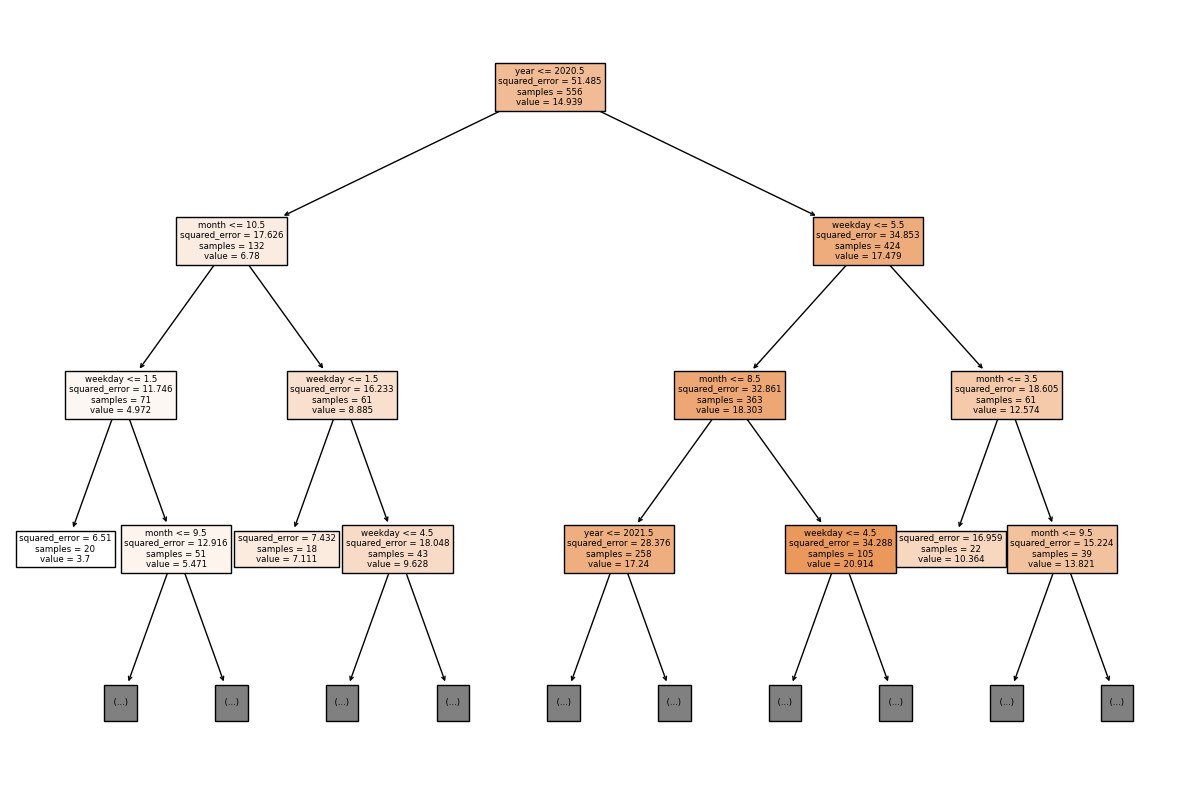

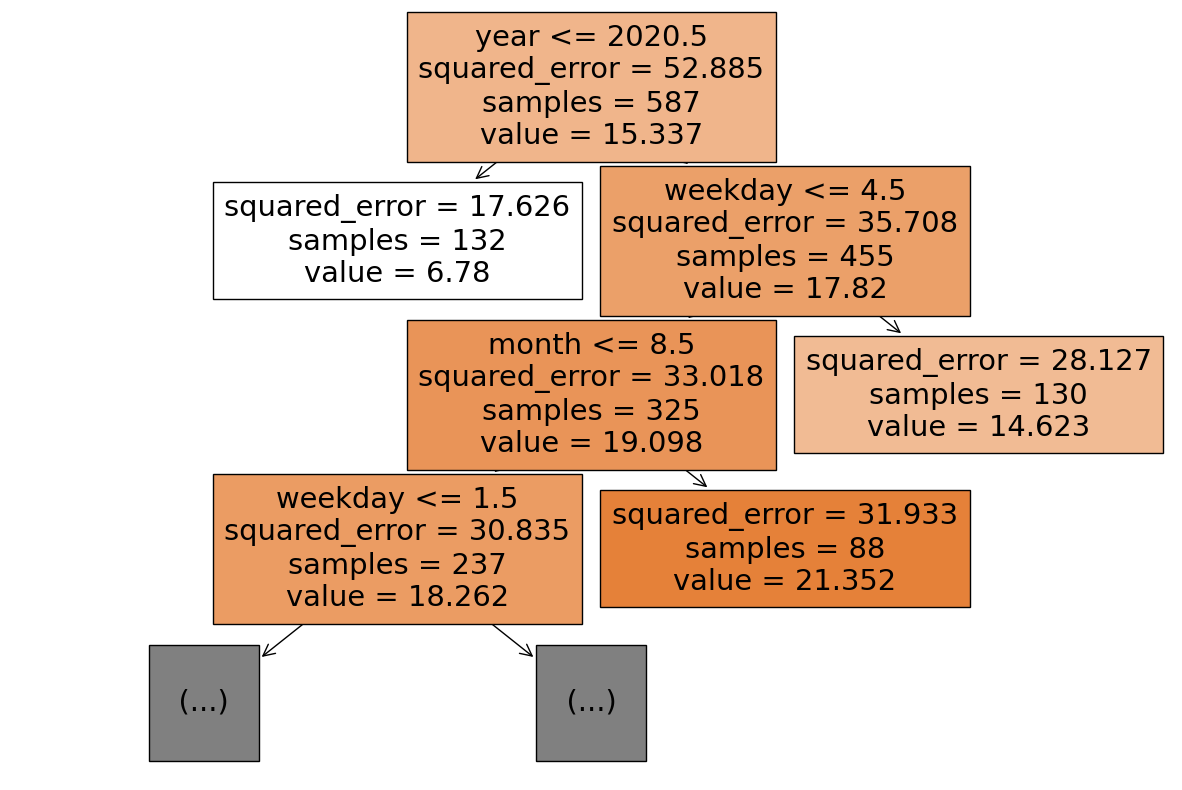

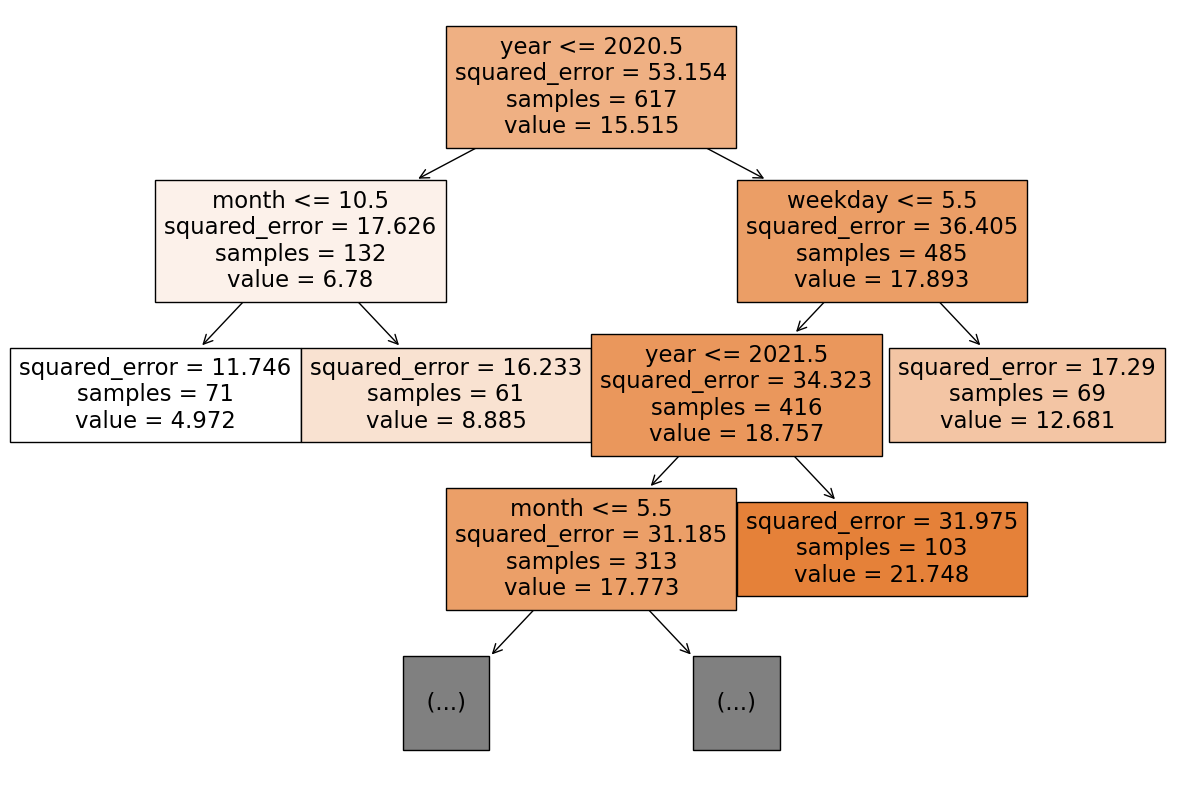

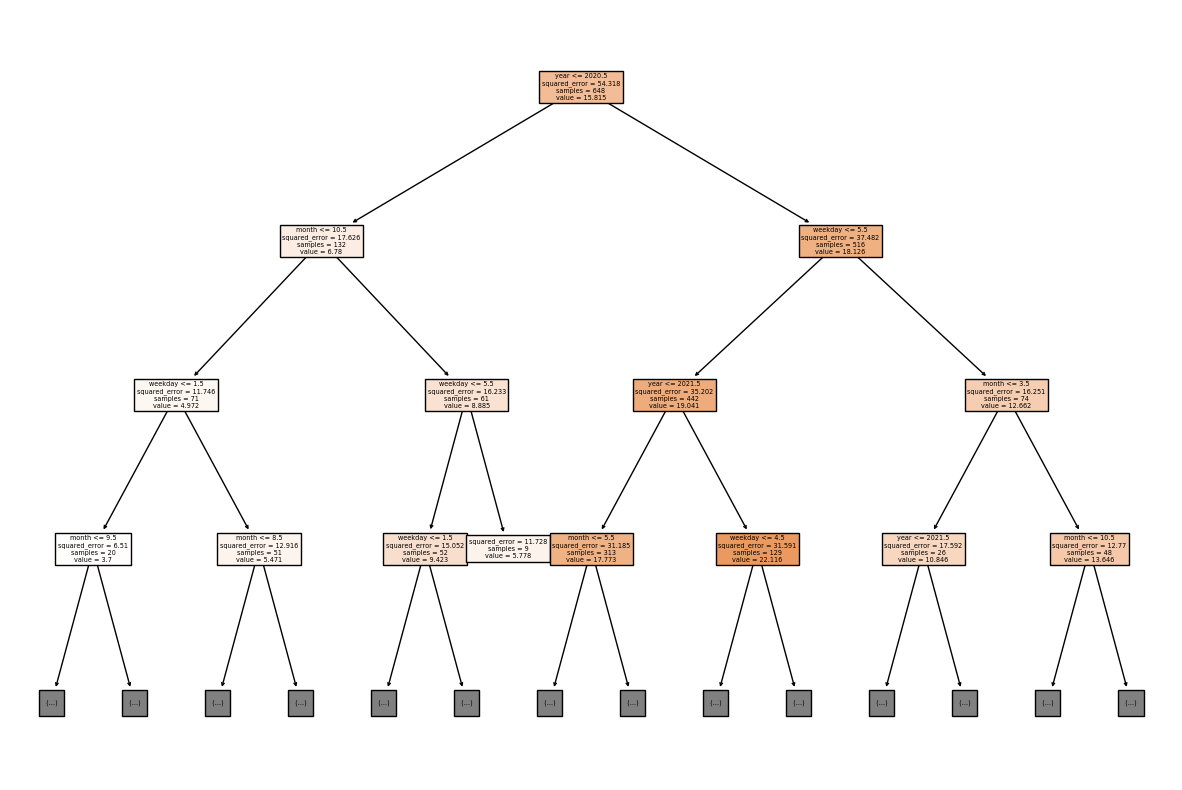

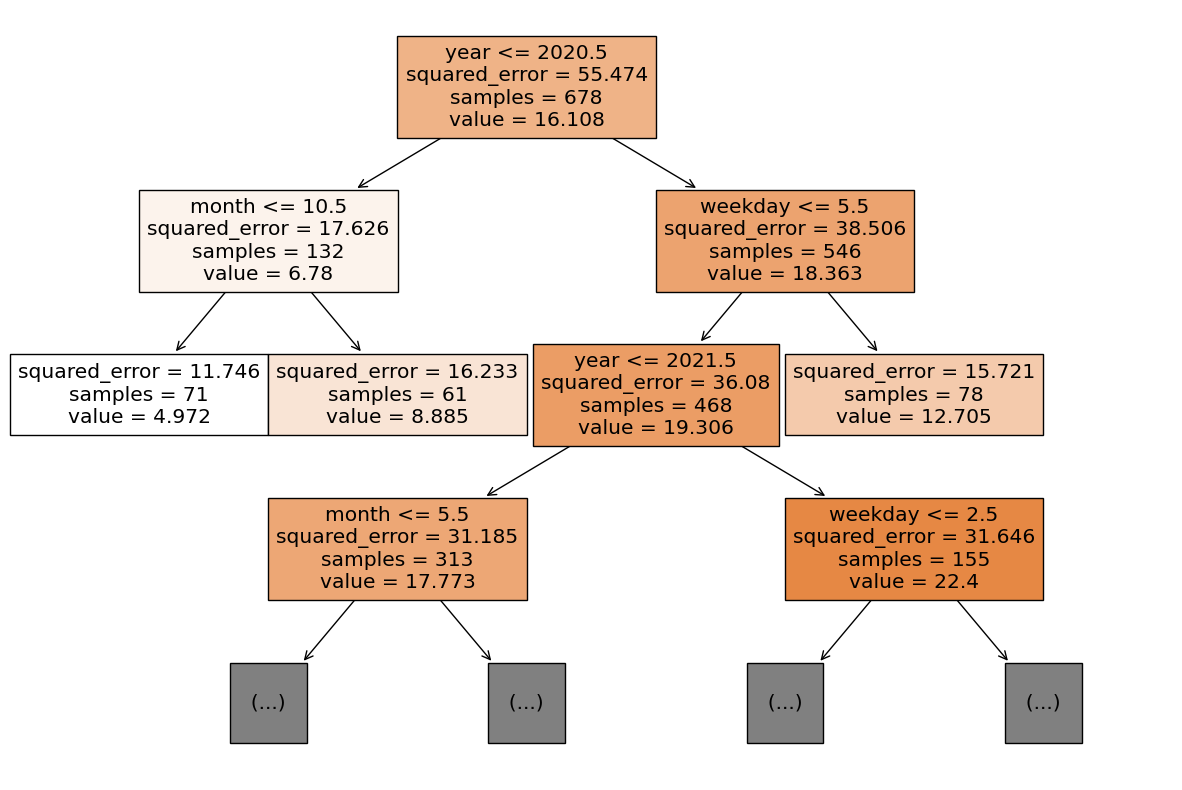

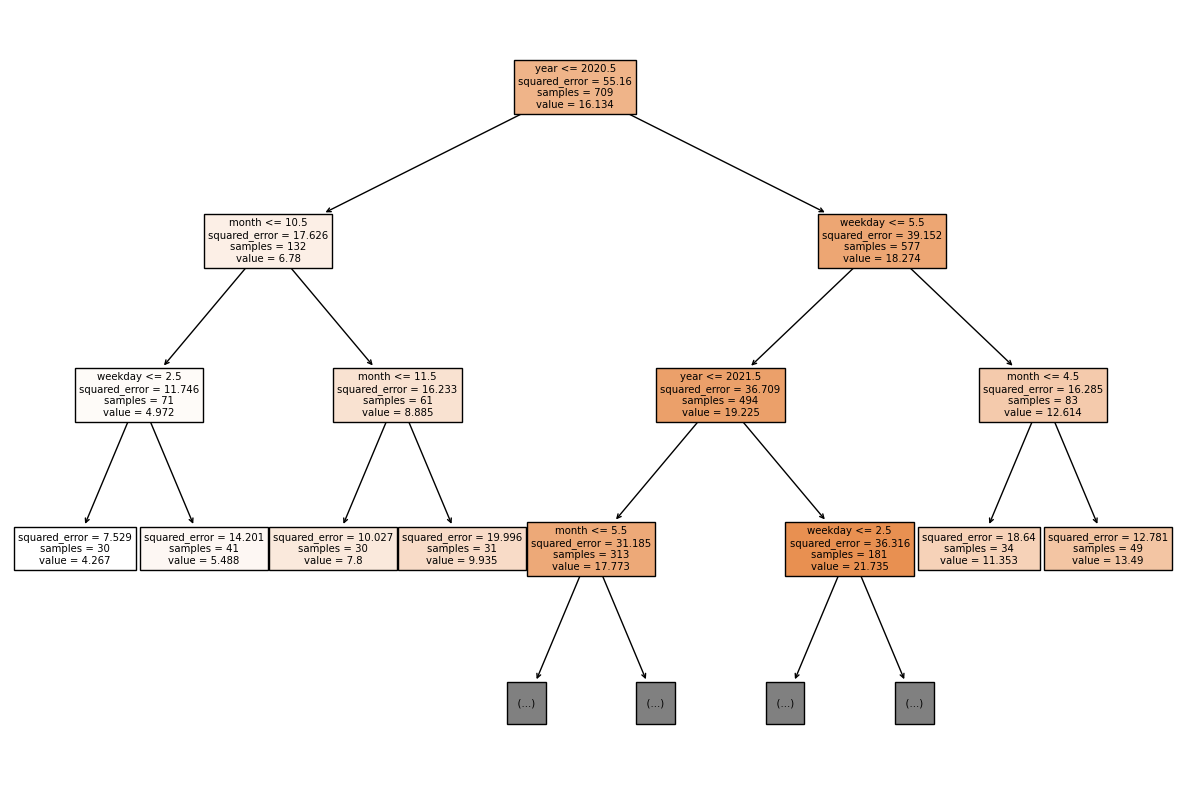

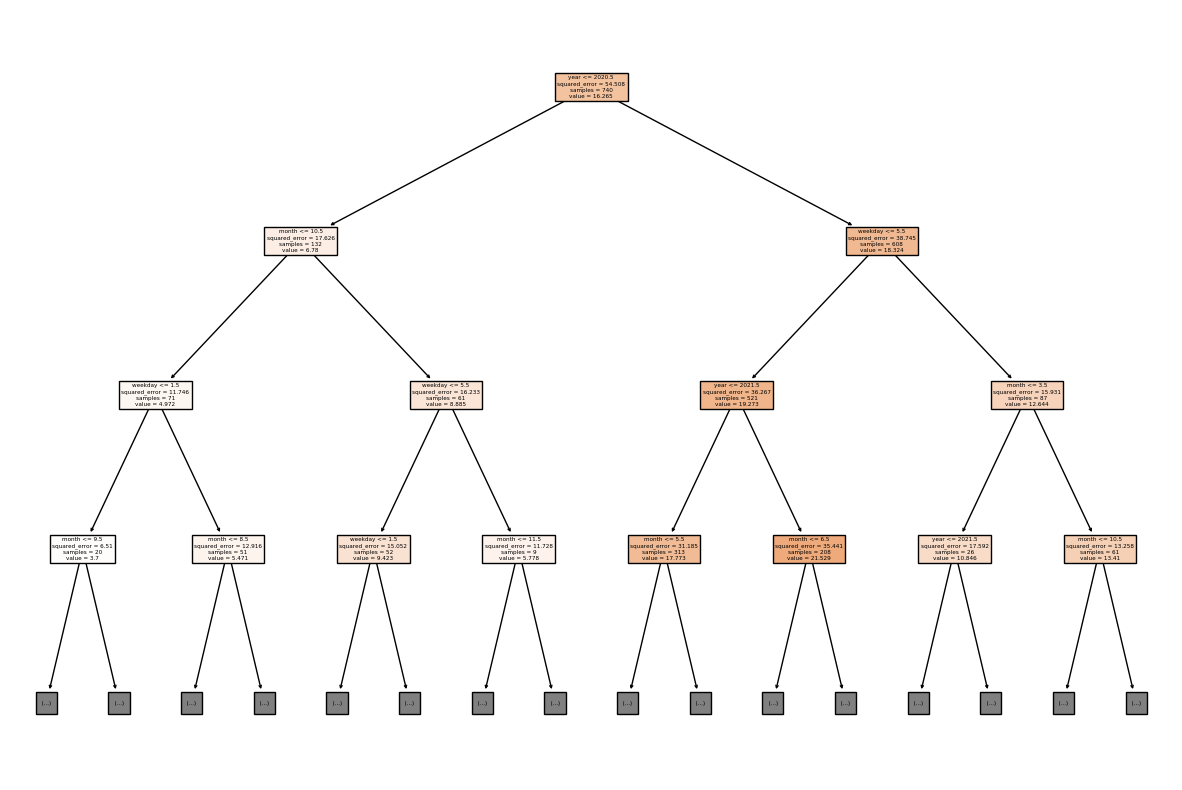

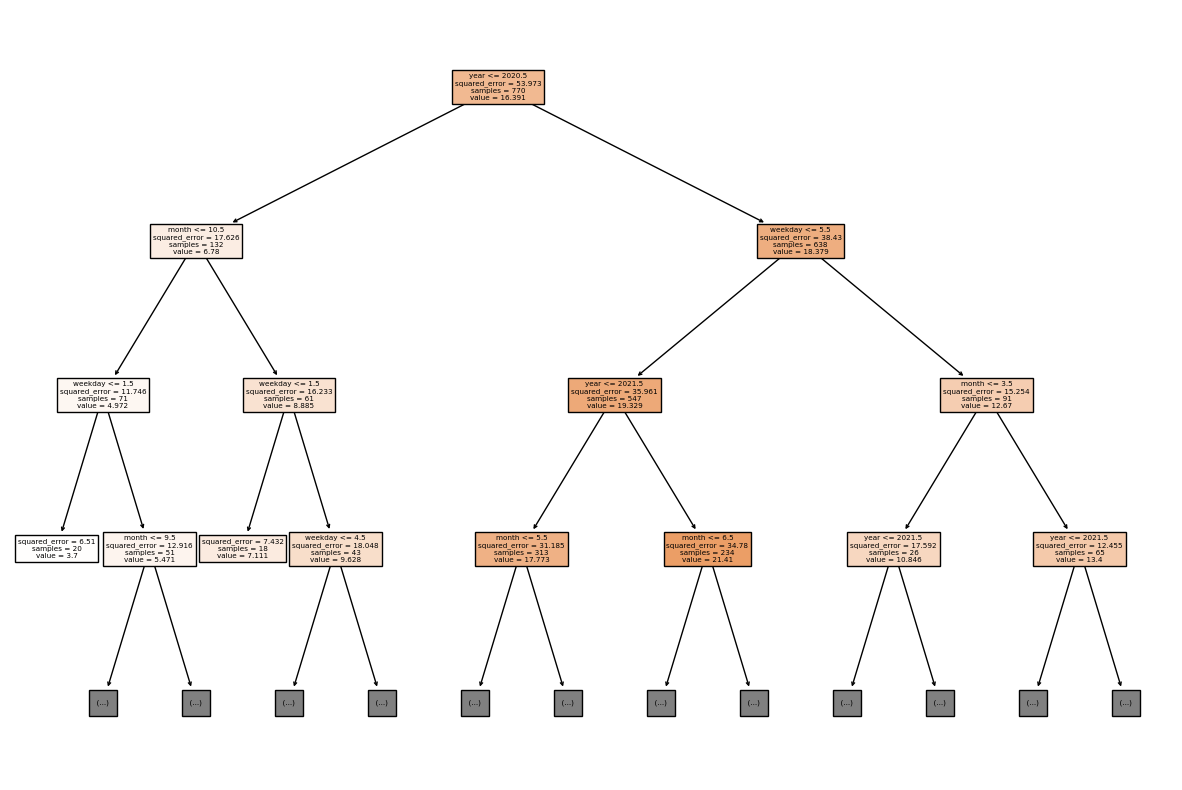

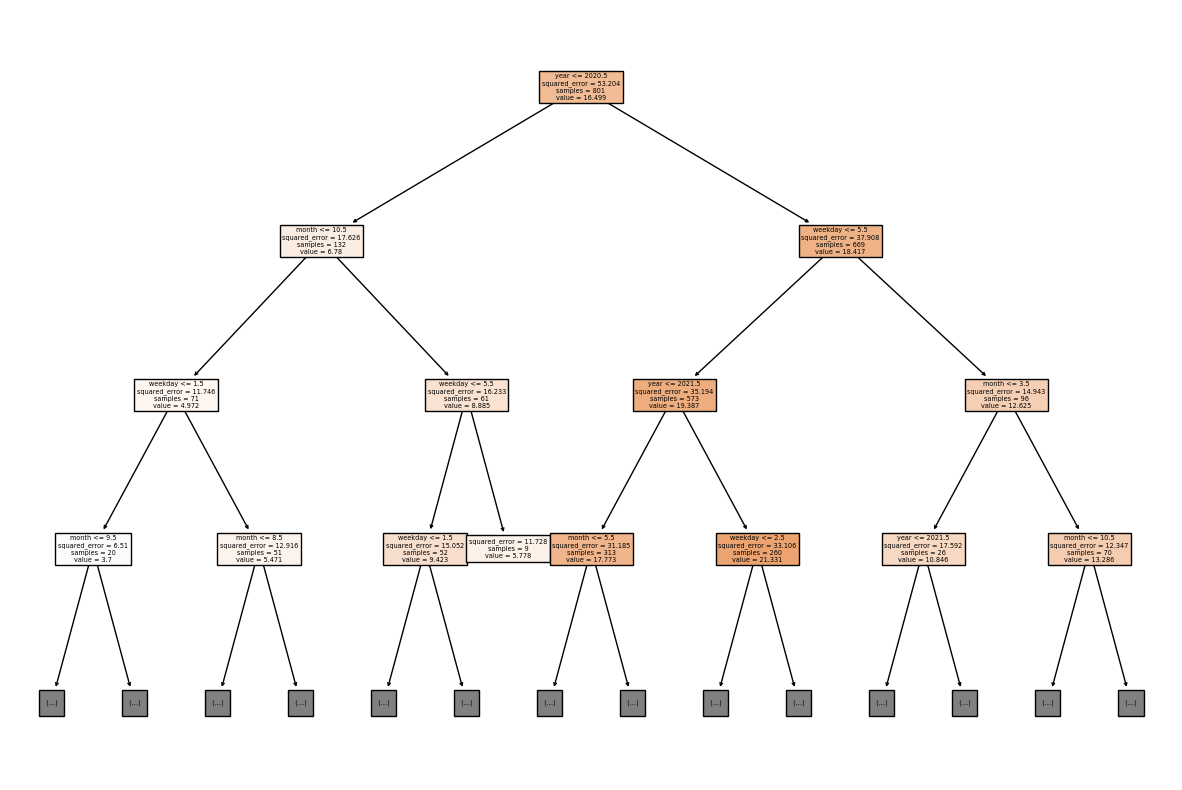

In [17]:
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_rt_performance(m01_train, m01_val, m01_test, 80)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_rt_performance(m02_train, m02_val, m02_test, 3)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_rt_performance(m03_train, m03_val, m03_test, 12)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_rt_performance(m04_train, m04_val, m04_test, 80)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_rt_performance(m05_train, m05_val, m05_test, 60)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_rt_performance(m06_train, m06_val, m06_test, 7)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_rt_performance(m07_train, m07_val, m07_test, 60)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_rt_performance(m08_train, m08_val, m08_test, 28)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_rt_performance(m09_train, m09_val, m09_test, 4)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_rt_performance(m10_train, m10_val, m10_test, 11)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_rt_performance(m11_train, m11_val, m11_test, 5)

### Arima:

In [18]:
df = df.asfreq('D')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 872 entries, 2020-08-22 to 2023-01-10
Freq: D
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cnt      872 non-null    int64
 1   year     872 non-null    int64
 2   month    872 non-null    int64
 3   day      872 non-null    int64
 4   weekday  872 non-null    int64
dtypes: int64(5)
memory usage: 40.9 KB


<AxesSubplot:xlabel='Datum'>

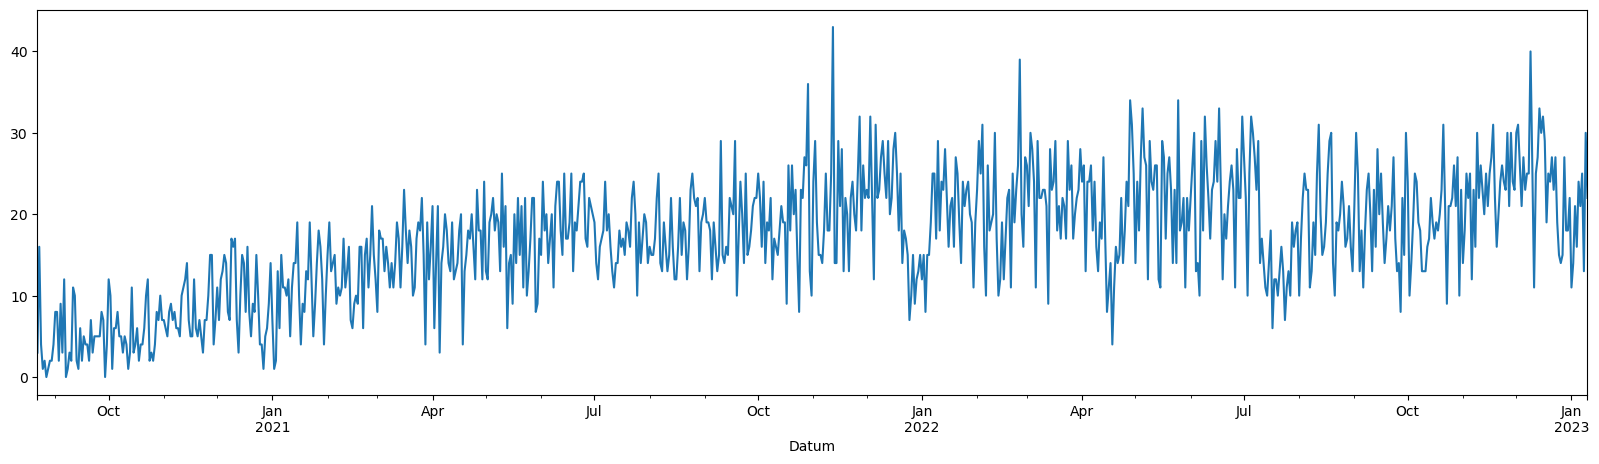

In [19]:
df.cnt.plot(figsize=(20,5))

In [20]:
# Stationärität prüfen
import statsmodels.tsa.stattools as sts
sts.adfuller(df.cnt)

(-2.614314215609937,
 0.09007475182467051,
 20,
 851,
 {'1%': -3.438057561354894,
  '5%': -2.864942268638857,
  '10%': -2.5685816343390853},
 5061.018563109055)

Identifizieren geeigneter AR- & MA-Lags: 

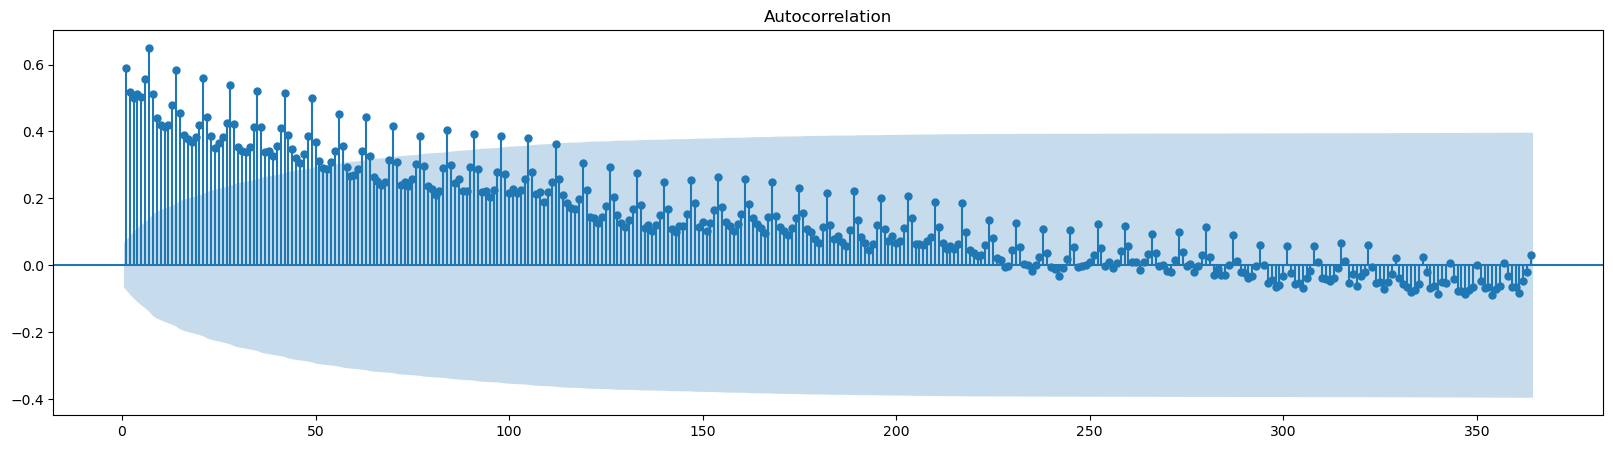

In [21]:
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,5))
sgt.plot_acf(df.cnt, lags = 7*52, zero = False, ax=ax) # zero = False bewirkt, dass der Lag 0 nicht vorkommt
plt.show()

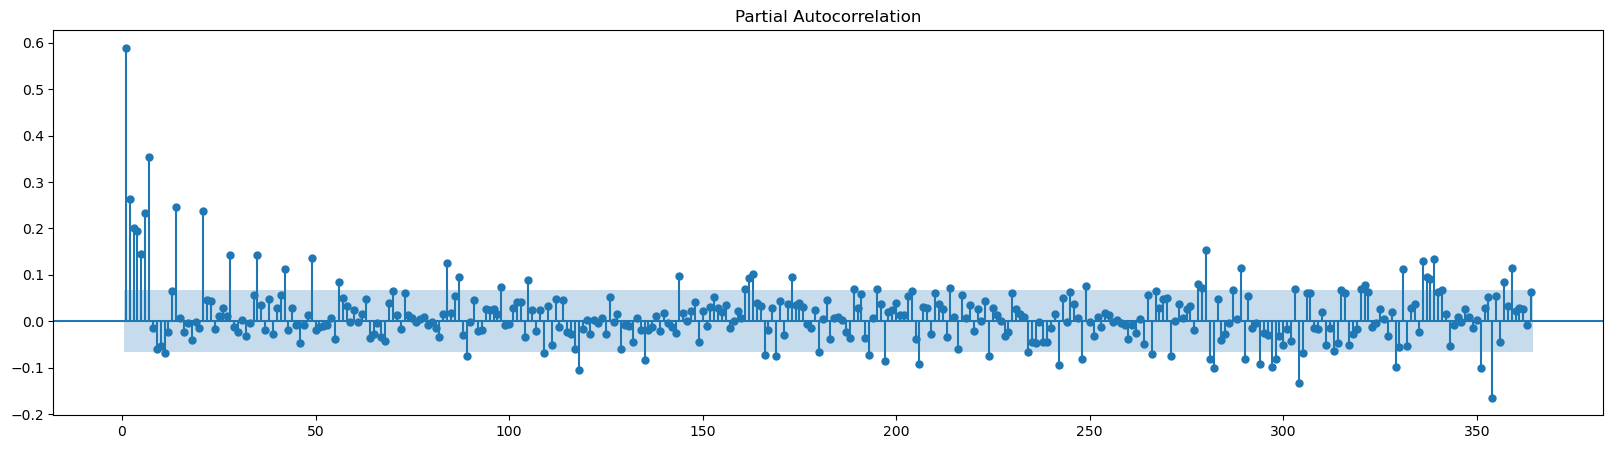

In [22]:
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,5))
sgt.plot_pacf(df.cnt, lags = 7*52, zero = False, method = ('ols'), ax = ax) 
plt.show()

Auto_AR-ARIMA:

In [24]:
from statsmodels.tsa.ar_model import ar_select_order
p1 = ar_select_order(m01_train.cnt, maxlag=6, glob=True).ar_lags
p2 = ar_select_order(m02_train.cnt, maxlag=6, glob=True).ar_lags
p3 = ar_select_order(m03_train.cnt, maxlag=6, glob=True).ar_lags
p4 = ar_select_order(m04_train.cnt, maxlag=6, glob=True).ar_lags
p5 = ar_select_order(m05_train.cnt, maxlag=6, glob=True).ar_lags
p6 = ar_select_order(m06_train.cnt, maxlag=6, glob=True).ar_lags
p7 = ar_select_order(m07_train.cnt, maxlag=6, glob=True).ar_lags
p8 = ar_select_order(m08_train.cnt, maxlag=6, glob=True).ar_lags
p9 = ar_select_order(m09_train.cnt, maxlag=6, glob=True).ar_lags
p10 = ar_select_order(m10_train.cnt, maxlag=6, glob=True).ar_lags
p11 = ar_select_order(m11_train.cnt, maxlag=6, glob=True).ar_lags
print(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11)

[1 3 4 6] [1 3 4 6] [1 3 4 6] [1 3 4 6] [1 3 4 6] [1 3 4 6] [1 3 4 6] [1 3 4 6] [1 3 4 6] [1 3 4 6] [1 3 4 6]


In [25]:
ar_select_order(df.cnt, maxlag=6, glob=True).ar_lags

array([1, 2, 4, 6])

In [26]:
d = 1
q = 0
P = 1
D = 0
Q = 1
s = 7

In [27]:
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_sarimax_performance(m01_train.cnt, m01_val.cnt, m01_test.cnt, p1 ,d,q,P,D,Q,s)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_sarimax_performance(m02_train.cnt, m02_val.cnt, m02_test.cnt, p2 ,d,q,P,D,Q,s)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_sarimax_performance(m03_train.cnt, m03_val.cnt, m03_test.cnt, p3 ,d,q,P,D,Q,s)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_sarimax_performance(m04_train.cnt, m04_val.cnt, m04_test.cnt, p4 ,d,q,P,D,Q,s)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_sarimax_performance(m05_train.cnt, m05_val.cnt, m05_test.cnt, p5 ,d,q,P,D,Q,s)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_sarimax_performance(m06_train.cnt, m06_val.cnt, m06_test.cnt, p6 ,d,q,P,D,Q,s)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_sarimax_performance(m07_train.cnt, m07_val.cnt, m07_test.cnt, p7 ,d,q,P,D,Q,s)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_sarimax_performance(m08_train.cnt, m08_val.cnt, m08_test.cnt, p8 ,d,q,P,D,Q,s)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_sarimax_performance(m09_train.cnt, m09_val.cnt, m09_test.cnt, p9 ,d,q,P,D,Q,s)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_sarimax_performance(m10_train.cnt, m10_val.cnt, m10_test.cnt, p10,d,q,P,D,Q,s)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_sarimax_performance(m11_train.cnt, m11_val.cnt, m11_test.cnt, p11,d,q,P,D,Q,s)

                                          SARIMAX Results                                           
Dep. Variable:                                          cnt   No. Observations:                  497
Model:             ARIMA([1, 3, 4, 6], 1, 0)x(1, 0, [1], 7)   Log Likelihood               -1499.320
Date:                                      Sun, 14 May 2023   AIC                           3012.640
Time:                                              11:42:52   BIC                           3042.087
Sample:                                          08-22-2020   HQIC                          3024.199
                                               - 12-31-2021                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4321      0.036  

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                          SARIMAX Results                                           
Dep. Variable:                                          cnt   No. Observations:                  528
Model:             ARIMA([1, 3, 4, 6], 1, 0)x(1, 0, [1], 7)   Log Likelihood               -1588.439
Date:                                      Sun, 14 May 2023   AIC                           3190.879
Time:                                              11:42:53   BIC                           3220.749
Sample:                                          08-22-2020   HQIC                          3202.573
                                               - 01-31-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4444      0.034  

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                          SARIMAX Results                                           
Dep. Variable:                                          cnt   No. Observations:                  556
Model:             ARIMA([1, 3, 4, 6], 1, 0)x(1, 0, [1], 7)   Log Likelihood               -1677.008
Date:                                      Sun, 14 May 2023   AIC                           3368.016
Time:                                              11:42:54   BIC                           3398.249
Sample:                                          08-22-2020   HQIC                          3379.826
                                               - 02-28-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4419      0.034  

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                          SARIMAX Results                                           
Dep. Variable:                                          cnt   No. Observations:                  587
Model:             ARIMA([1, 3, 4, 6], 1, 0)x(1, 0, [1], 7)   Log Likelihood               -1770.512
Date:                                      Sun, 14 May 2023   AIC                           3555.023
Time:                                              11:42:54   BIC                           3585.636
Sample:                                          08-22-2020   HQIC                          3566.953
                                               - 03-31-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4591      0.033  

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                          SARIMAX Results                                           
Dep. Variable:                                          cnt   No. Observations:                  617
Model:             ARIMA([1, 3, 4, 6], 1, 0)x(1, 0, [1], 7)   Log Likelihood               -1871.097
Date:                                      Sun, 14 May 2023   AIC                           3756.194
Time:                                              11:42:55   BIC                           3787.157
Sample:                                          08-22-2020   HQIC                          3768.233
                                               - 04-30-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4545      0.032  

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                          SARIMAX Results                                           
Dep. Variable:                                          cnt   No. Observations:                  648
Model:             ARIMA([1, 3, 4, 6], 1, 0)x(1, 0, [1], 7)   Log Likelihood               -1975.163
Date:                                      Sun, 14 May 2023   AIC                           3964.326
Time:                                              11:42:56   BIC                           3995.632
Sample:                                          08-22-2020   HQIC                          3976.471
                                               - 05-31-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4583      0.031  

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                          SARIMAX Results                                           
Dep. Variable:                                          cnt   No. Observations:                  678
Model:             ARIMA([1, 3, 4, 6], 1, 0)x(1, 0, [1], 7)   Log Likelihood               -2069.137
Date:                                      Sun, 14 May 2023   AIC                           4152.274
Time:                                              11:42:57   BIC                           4183.897
Sample:                                          08-22-2020   HQIC                          4164.517
                                               - 06-30-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4794      0.030  

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                          SARIMAX Results                                           
Dep. Variable:                                          cnt   No. Observations:                  709
Model:             ARIMA([1, 3, 4, 6], 1, 0)x(1, 0, [1], 7)   Log Likelihood               -2164.709
Date:                                      Sun, 14 May 2023   AIC                           4343.418
Time:                                              11:42:58   BIC                           4375.355
Sample:                                          08-22-2020   HQIC                          4355.757
                                               - 07-31-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4691      0.029  

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                          SARIMAX Results                                           
Dep. Variable:                                          cnt   No. Observations:                  740
Model:             ARIMA([1, 3, 4, 6], 1, 0)x(1, 0, [1], 7)   Log Likelihood               -2261.303
Date:                                      Sun, 14 May 2023   AIC                           4536.605
Time:                                              11:42:59   BIC                           4568.842
Sample:                                          08-22-2020   HQIC                          4549.036
                                               - 08-31-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4644      0.029  

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                          SARIMAX Results                                           
Dep. Variable:                                          cnt   No. Observations:                  770
Model:             ARIMA([1, 3, 4, 6], 1, 0)x(1, 0, [1], 7)   Log Likelihood               -2352.550
Date:                                      Sun, 14 May 2023   AIC                           4719.100
Time:                                              11:43:00   BIC                           4751.616
Sample:                                          08-22-2020   HQIC                          4731.615
                                               - 09-30-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4733      0.028  

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                          SARIMAX Results                                           
Dep. Variable:                                          cnt   No. Observations:                  801
Model:             ARIMA([1, 3, 4, 6], 1, 0)x(1, 0, [1], 7)   Log Likelihood               -2444.102
Date:                                      Sun, 14 May 2023   AIC                           4902.203
Time:                                              11:43:02   BIC                           4934.995
Sample:                                          08-22-2020   HQIC                          4914.800
                                               - 10-31-2022                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4709      0.028  

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


auto-ARIMA:

In [36]:
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_auto_arima_performance(m01_train.cnt, m01_val.cnt, m01_test.cnt)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_auto_arima_performance(m02_train.cnt, m02_val.cnt, m02_test.cnt)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_auto_arima_performance(m03_train.cnt, m03_val.cnt, m03_test.cnt)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_auto_arima_performance(m04_train.cnt, m04_val.cnt, m04_test.cnt)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_auto_arima_performance(m05_train.cnt, m05_val.cnt, m05_test.cnt)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_auto_arima_performance(m06_train.cnt, m06_val.cnt, m06_test.cnt)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_auto_arima_performance(m07_train.cnt, m07_val.cnt, m07_test.cnt)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_auto_arima_performance(m08_train.cnt, m08_val.cnt, m08_test.cnt)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_auto_arima_performance(m09_train.cnt, m09_val.cnt, m09_test.cnt)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_auto_arima_performance(m10_train.cnt, m10_val.cnt, m10_test.cnt)
qual_train.loc[len(qual_train)], qual_val.loc[len(qual_val)], qual_test.loc[len(qual_test)] = rt_processing.get_auto_arima_performance(m11_train.cnt, m11_val.cnt, m11_test.cnt)

                                     SARIMAX Results                                     
Dep. Variable:                               cnt   No. Observations:                  497
Model:             ARIMA(0, 1, 3)x(2, 0, [1], 7)   Log Likelihood               -1422.834
Date:                           Sun, 14 May 2023   AIC                           2859.669
Time:                                   11:45:31   BIC                           2889.115
Sample:                               08-22-2020   HQIC                          2871.227
                                    - 12-31-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8084      0.040    -20.356      0.000      -0.886      -0.731
ma.L2         -0.1162      0.058     -2.010

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                     SARIMAX Results                                     
Dep. Variable:                               cnt   No. Observations:                  528
Model:             ARIMA(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -1516.155
Date:                           Sun, 14 May 2023   AIC                           3042.310
Time:                                   11:46:10   BIC                           3063.646
Sample:                               08-22-2020   HQIC                          3050.663
                                    - 01-31-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8019      0.038    -21.064      0.000      -0.877      -0.727
ma.L2         -0.0947      0.038     -2.461

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                     
Dep. Variable:                               cnt   No. Observations:                  556
Model:             ARIMA(1, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -1597.011
Date:                           Sun, 14 May 2023   AIC                           3206.022
Time:                                   11:47:04   BIC                           3231.936
Sample:                               08-22-2020   HQIC                          3216.145
                                    - 02-28-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8520      0.063     13.518      0.000       0.728       0.976
ma.L1         -1.6871      0.080    -21.030

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization faile

                                     SARIMAX Results                                     
Dep. Variable:                               cnt   No. Observations:                  587
Model:             ARIMA(4, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -1681.564
Date:                           Sun, 14 May 2023   AIC                           3381.128
Time:                                   11:49:39   BIC                           3420.488
Sample:                               08-22-2020   HQIC                          3396.466
                                    - 03-31-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5852      0.218      2.685      0.007       0.158       1.012
ar.L2         -0.0106      0.060     -0.176

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                    SARIMAX Results                                    
Dep. Variable:                             cnt   No. Observations:                  648
Model:             ARIMA(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1894.527
Date:                         Sun, 14 May 2023   AIC                           3797.053
Time:                                 11:52:14   BIC                           3814.943
Sample:                             08-22-2020   HQIC                          3803.994
                                  - 05-31-2022                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8239      0.021    -39.804      0.000      -0.865      -0.783
ar.S.L7        0.9934      0.007    140.649      0.000     

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                      SARIMAX Results                                       
Dep. Variable:                                  cnt   No. Observations:                  678
Model:             ARIMA(0, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood               -1986.480
Date:                              Sun, 14 May 2023   AIC                           3982.960
Time:                                      11:52:50   BIC                           4005.548
Sample:                                  08-22-2020   HQIC                          3991.705
                                       - 06-30-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8304      0.020    -40.947      0.000      -0.870      -0.791
ar.S.L7        0.99

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                      SARIMAX Results                                       
Dep. Variable:                                  cnt   No. Observations:                  709
Model:             ARIMA(0, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood               -2086.628
Date:                              Sun, 14 May 2023   AIC                           4183.257
Time:                                      11:53:25   BIC                           4206.069
Sample:                                  08-22-2020   HQIC                          4192.070
                                       - 07-31-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7982      0.021    -37.739      0.000      -0.840      -0.757
ar.S.L7        0.99

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


                                     SARIMAX Results                                     
Dep. Variable:                               cnt   No. Observations:                  740
Model:             ARIMA(2, 1, 4)x(1, 0, [1], 7)   Log Likelihood               -2164.932
Date:                           Sun, 14 May 2023   AIC                           4347.864
Time:                                   11:58:13   BIC                           4389.312
Sample:                               08-22-2020   HQIC                          4363.846
                                    - 08-31-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2693      0.205      6.187      0.000       0.867       1.671
ar.L2         -0.4682      0.185     -2.532

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100
/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                    SARIMAX Results                                    
Dep. Variable:                             cnt   No. Observations:                  801
Model:             ARIMA(1, 1, 2)x(0, 0, 2, 7)   Log Likelihood               -2417.063
Date:                         Sun, 14 May 2023   AIC                           4846.126
Time:                                 11:59:57   BIC                           4874.234
Sample:                             08-22-2020   HQIC                          4856.924
                                  - 10-31-2022                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7861      0.095      8.232      0.000       0.599       0.973
ma.L1         -1.6177      0.110    -14.720      0.000     

/Users/manuel/Library/Mobile Documents/com~apple~CloudDocs/manuelguggisberg/Schule/HSLU/Bachelorarbeit/myBuxi/Dashboard/Code/Prognosemodell/Täglich_Region/rt_processing.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


## Vergleich Modell-Performances:

/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1249: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='MAE', ylabel='Model'>

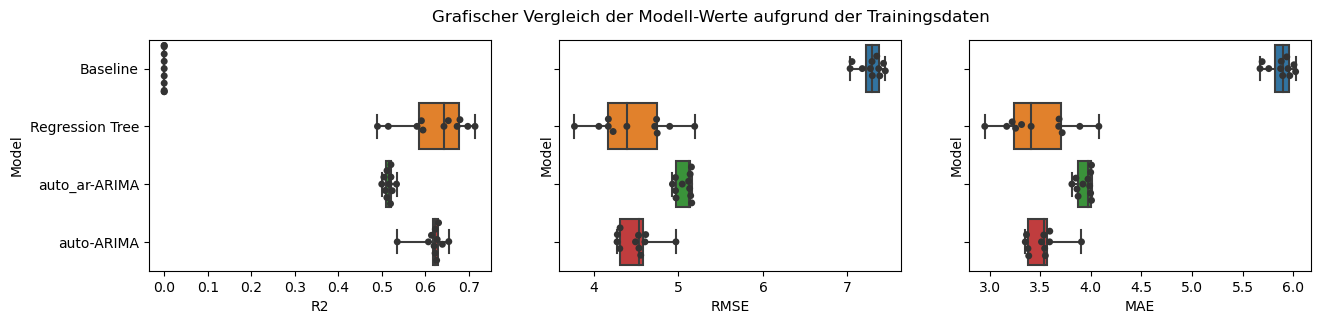

In [37]:
fig, axes = plt.subplots(1,3, figsize=(15, 3), sharey=True)
fig.suptitle('Grafischer Vergleich der Modell-Werte aufgrund der Trainingsdaten')

# R2
sns.boxplot(ax=axes[0], x="R2", y="Model", data=qual_train, whis=np.inf)
sns.swarmplot(ax=axes[0], x="R2", y="Model", data=qual_train, color=".2")

# RMSE
sns.boxplot(ax=axes[1], x="RMSE", y="Model", data=qual_train, whis=np.inf)
sns.swarmplot(ax=axes[1], x="RMSE", y="Model", data=qual_train, color=".2")

# MAE
sns.boxplot(ax=axes[2], x="MAE", y="Model", data=qual_train, whis=np.inf)
sns.swarmplot(ax=axes[2], x="MAE", y="Model", data=qual_train, color=".2")


In [38]:
# Durchschnittswerte pro Modell
qual_train.groupby('Model').mean()

,R2,RMSE,MAE,MAPE
Model,,,,
Baseline,0.000000,7.281111,5.876668,inf
Regression Tree,0.621325,4.461439,3.489733,inf
auto-ARIMA,0.618385,4.495517,3.520216,inf
auto_ar-ARIMA,0.515948,5.065177,3.935916,inf


/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1249: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='MAE', ylabel='Model'>

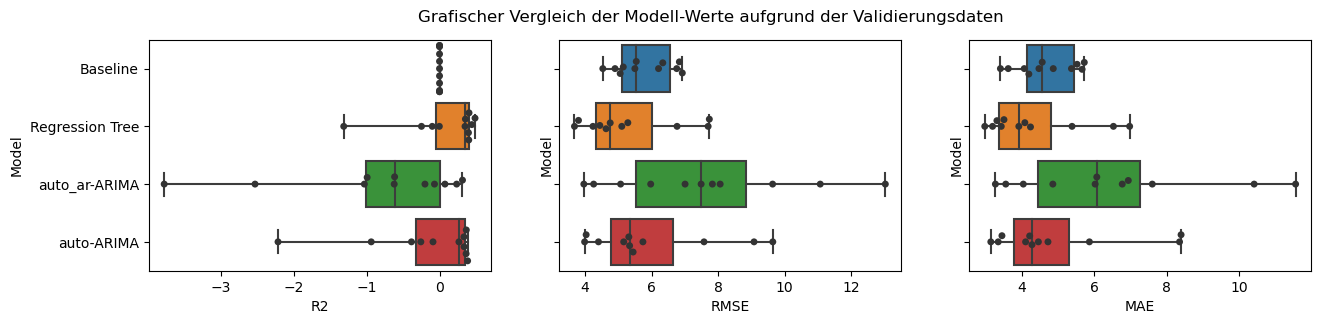

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
fig.suptitle('Grafischer Vergleich der Modell-Werte aufgrund der Validierungsdaten')

# R2
sns.boxplot(ax=axes[0], x="R2", y="Model", data=qual_val, whis=np.inf)
sns.swarmplot(ax=axes[0], x="R2", y="Model", data=qual_val, color=".2")

# RMSE
sns.boxplot(ax=axes[1], x="RMSE", y="Model", data=qual_val, whis=np.inf)
sns.swarmplot(ax=axes[1], x="RMSE", y="Model", data=qual_val, color=".2")

# MAE
sns.boxplot(ax=axes[2], x="MAE", y="Model", data=qual_val, whis=np.inf)
sns.swarmplot(ax=axes[2], x="MAE", y="Model", data=qual_val, color=".2")

In [40]:
# Durchschnittswerte pro Modell
qual_val.groupby('Model').mean()

,R2,RMSE,MAE,MAPE
Model,,,,
Baseline,0.000000,5.796845,4.683762,28.493735
Regression Tree,0.106711,5.289169,4.326749,24.498847
auto-ARIMA,-0.166606,5.977304,4.943377,29.398509
auto_ar-ARIMA,-0.839381,7.580759,6.466371,39.629886


## Vergleich Vorhersagen:

ARIMA:

In [41]:
qual_val[qual_val.Model == 'auto_ar-ARIMA']

,Model,Dataset,R2,RMSE,MAE,MAPE
22,auto_ar-ARIMA,val_set,-3.784146,11.065994,10.413784,52.012480
23,auto_ar-ARIMA,val_set,-0.200210,7.489730,6.072267,26.310562
24,auto_ar-ARIMA,val_set,-0.069499,5.072284,4.044888,22.305911
25,auto_ar-ARIMA,val_set,-1.033368,9.636242,7.603603,67.537821
26,auto_ar-ARIMA,val_set,-0.617560,8.061338,6.774548,40.804604
27,auto_ar-ARIMA,val_set,0.074322,5.975920,4.859713,21.649713
28,auto_ar-ARIMA,val_set,-2.535629,13.020224,11.557916,94.485455
29,auto_ar-ARIMA,val_set,-0.623075,7.007690,6.026878,38.972646
30,auto_ar-ARIMA,val_set,-0.994756,7.827659,6.941085,34.714840
31,auto_ar-ARIMA,val_set,0.315425,4.262724,3.560695,22.518321


In [42]:
qual_val[qual_val.Model == 'auto-ARIMA']

,Model,Dataset,R2,RMSE,MAE,MAPE
33,auto-ARIMA,val_set,-2.219690,9.078106,8.355450,41.786576
34,auto-ARIMA,val_set,0.365081,5.447494,4.284532,22.563553
35,auto-ARIMA,val_set,0.337400,3.992445,3.148697,15.638018
36,auto-ARIMA,val_set,-0.256956,7.576344,5.868581,52.077029
37,auto-ARIMA,val_set,0.335792,5.165698,4.108289,23.421621
38,auto-ARIMA,val_set,0.266660,5.318971,4.220773,20.033508
39,auto-ARIMA,val_set,-0.938817,9.641698,8.397666,68.335218
40,auto-ARIMA,val_set,-0.089715,5.741986,4.725040,23.288414
41,auto-ARIMA,val_set,0.367473,4.407847,3.352195,18.982380
42,auto-ARIMA,val_set,0.385882,4.037405,3.455518,18.096240


In [43]:
from statsmodels.tsa.arima.model import ARIMA

In [48]:
auto_ar_arima_model = ARIMA(m10_train.cnt, order=([1, 3, 4, 6],1,0), seasonal_order=(1,0,1,7)).fit()
auto_arima_model = ARIMA(m10_train.cnt, order=(2,1,4), seasonal_order=(1,0,1,7)).fit()

prediction_auto_ar = pd.DataFrame(auto_ar_arima_model.predict(start=m10_val.index[0], end=m10_val.index[m10_val.shape[0] -1]))
prediction_auto_arima = pd.DataFrame(auto_arima_model.predict(start=m10_val.index[0], end=m10_val.index[m10_val.shape[0] -1]))

/Users/manuel/opt/anaconda3/envs/DSIntro_2020/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<AxesSubplot:>

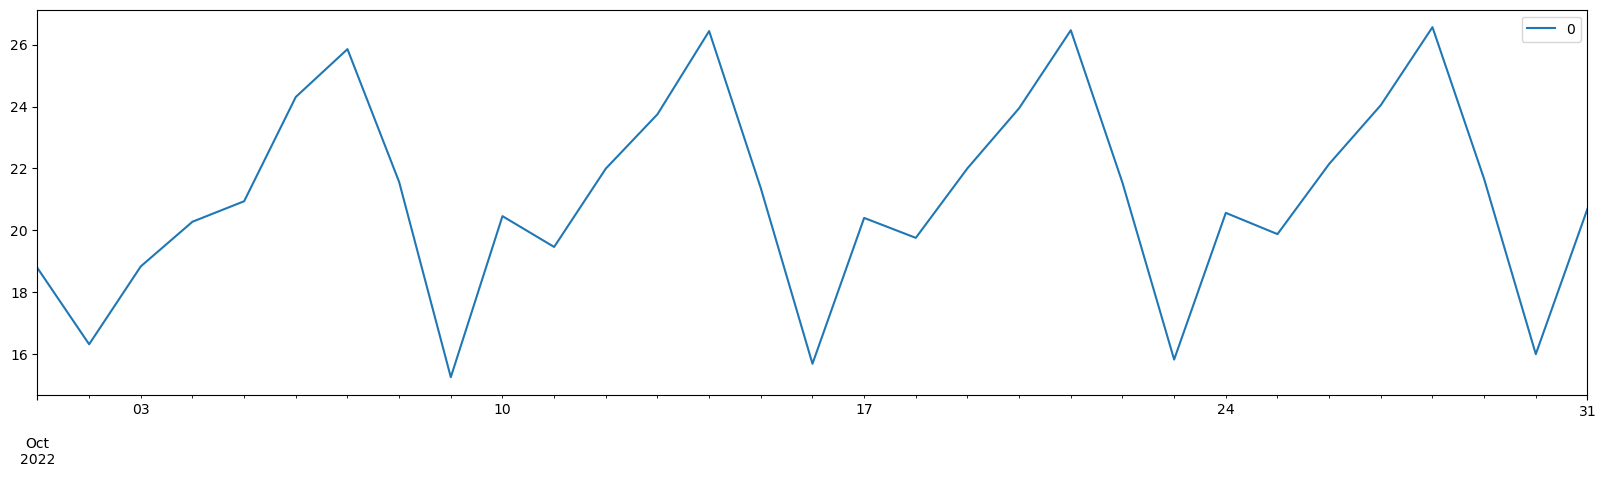

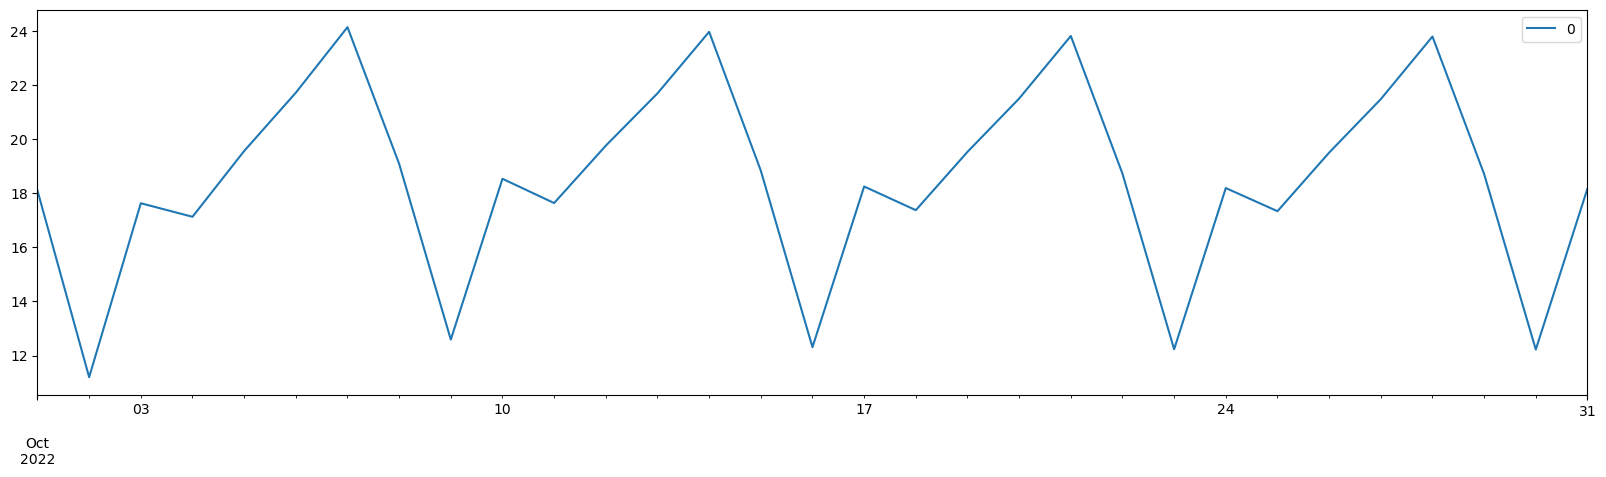

In [49]:
prediction_auto_ar.plot(figsize=(20,5))
prediction_auto_arima.plot(figsize=(20,5))

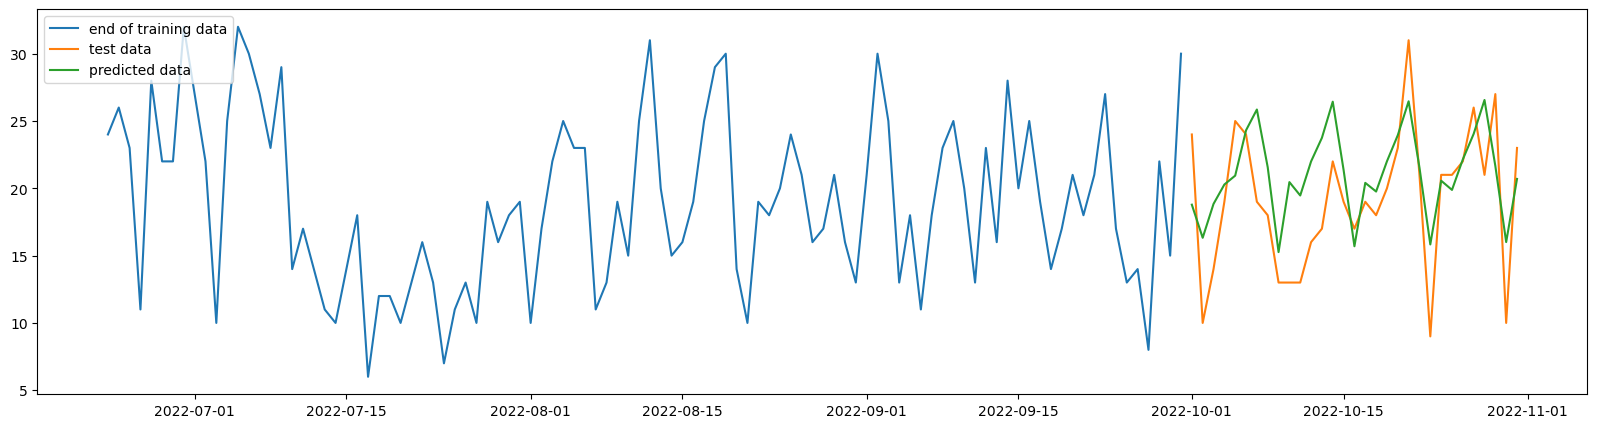

In [51]:
plt.figure(figsize=(20,5))
plt.plot(m10_train.cnt[-100:], label="end of training data")
plt.plot(m10_val.cnt, label="test data")
plt.plot(prediction_auto_ar, label="predicted data")
plt.legend(loc = 'upper left')

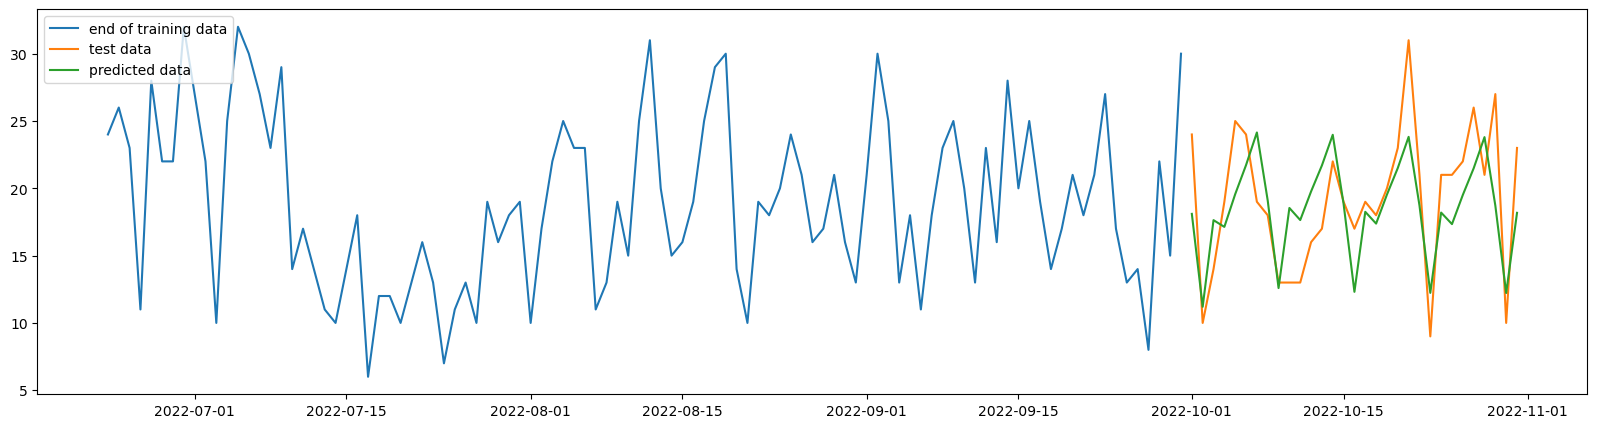

In [52]:
plt.figure(figsize=(20,5))
plt.plot(m10_train.cnt[-100:], label="end of training data")
plt.plot(m10_val.cnt, label="test data")
plt.plot(prediction_auto_arima, label="predicted data")
plt.legend(loc = 'upper left')

Regression Tree:

In [53]:
qual_val[qual_val.Model == 'Regression Tree']

,Model,Dataset,R2,RMSE,MAE,MAPE
11,Regression Tree,val_set,-1.316405,7.700084,6.531510,30.879912
12,Regression Tree,val_set,0.401465,5.289106,4.242857,22.036199
13,Regression Tree,val_set,0.397412,3.807357,2.981916,13.311921
14,Regression Tree,val_set,-0.002718,6.766888,5.389179,36.876222
15,Regression Tree,val_set,0.350459,5.108345,4.087429,19.159447
16,Regression Tree,val_set,0.443099,4.635150,3.511218,18.861929
17,Regression Tree,val_set,-0.248179,7.736125,6.978500,53.155406
18,Regression Tree,val_set,0.405307,4.241817,3.436441,21.322338
19,Regression Tree,val_set,0.355676,4.448764,3.316667,19.490163
20,Regression Tree,val_set,0.487736,3.687428,3.196739,17.580871


In [72]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=45)
fitted_tree = reg_tree.fit(m10_train[['year', 'month', 'weekday']].to_numpy(), m10_train[['cnt']].to_numpy())
rt_prediction  = fitted_tree.predict(m10_val[['year', 'month', 'weekday']].to_numpy())

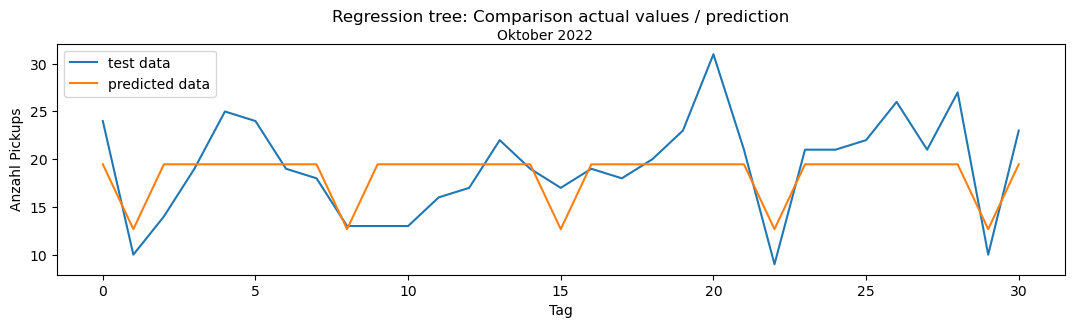

In [73]:
plt.figure(figsize=(13,3))
plt.title('Regression tree: Comparison actual values / prediction', y=1.06)
plt.suptitle('Oktober 2022', fontsize=10, y=0.93)
plt.ylabel('Anzahl Pickups')
plt.xlabel('Tag')
plt.plot(m10_val.cnt.to_numpy(), label="test data")
plt.plot(rt_prediction, label="predicted data")
plt.legend(loc = 'upper left')

Wochentage mit tiefen bzw. hohen Prognosen:

In [86]:
print('RT Indizes mit tiefsten Werten: ', np.argsort(rt_prediction)[:5])

RT Indizes mit tiefsten Werten:  [15  1  8 22 29]


In [85]:
print('Auto-ARIMA prediction mit höchsten Werten:\n', prediction_auto_arima.sort_values(by=0).tail(5))
print('\nAuto-ARIMA prediction mit teifsten Werten:\n', prediction_auto_arima.sort_values(by=0).head(5))

Auto-ARIMA prediction mit höchsten Werten:
                     0
2022-10-06  21.724256
2022-10-28  23.803140
2022-10-21  23.823081
2022-10-14  23.976411
2022-10-07  24.148620

Auto-ARIMA prediction mit teifsten Werten:
                     0
2022-10-02  11.199940
2022-10-30  12.223314
2022-10-23  12.233958
2022-10-16  12.310346
2022-10-09  12.591253


--> An Sonntagen werden am wenigsten Pickups prognostiziert

--> An Freitagen am meisten

Dies ist auch an den Durchschnittswerten der erfassten Daten zu sehen:

In [88]:
df.groupby('weekday').cnt.mean()

weekday
0    16.880000
1    16.216000
2    18.258065
3    18.709677
4    20.758065
5    16.640000
6    11.840000
Name: cnt, dtype: float64